# Airline Passenger Satisfaction Analysis


Bu projede, bir havayolu firmasına ait yolcu verileri üzerinden **memnuniyet düzeylerini etkileyen faktörleri analiz etmeyi** amaçladım.  
Veri seti, yolcuların demografik bilgileri, seyahat detayları ve uçuş sırasında aldıkları hizmetlere verdikleri puanları içermektedir.  
Hedef değişken olan **"satisfaction"**, yolcunun uçuş deneyiminden memnun kalıp kalmadığını ifade eder.

Yapılan analizlerle yolcu memnuniyetini artırabilecek alanları tespit etmek, hangi hizmetlerin öne çıktığını belirlemek ve şirketin stratejik iyileştirme planlarına katkı sunmak hedeflenmiştir.


## 1. Veri Seti Tanımı
Hava yolu yolcularına dair bilgiler içeriyor. Yolcuların demografik verileri, uçuş detayları ve hizmet deneyimlerine ilişkin değerlendirmeleri yer almakta. "Satisfaction" sütunu, müşteri memnuniyet durumunu gösteriyor.




## 2. Problem Tanımı
Hedef değişken "satisfaction" olup, müşterinin uçuş deneyiminden memnun kalıp kalmadığını belirtir.

## 3. Analiz Planı
- İstatistiksel Özet
- Eksik Değer Analizi
- Aykırı Değer Analizi
- Görselleştirmeler
- Yorumlar


- `Unnamed: 0` sütunu, veri setine otomatik olarak eklenmiş bir sıra numarasını temsil eder.  
- `id`, her yolcuya ait benzersiz bir kimlik numarasıdır.  
- `Gender`, yolcunun cinsiyetini belirtir (Male/Female).  
- `Customer Type`, müşterinin türünü gösterir; sadık müşteriler "Loyal", ilk kez uçanlar ise "Disloyal" olarak tanımlanır.  
- `Age`, yolcunun yaşıdır.  
- `Type of Travel`, seyahatin amacını belirtir; iş seyahati (Business) veya kişisel seyahat (Personal) olabilir.  
- `Class`, uçulan kabin sınıfını gösterir (Eco, Eco Plus, Business).  
- `Flight Distance`, uçuşun mesafesini kilometre cinsinden ifade eder.  
- `Inflight wifi service`, yolcuların uçuş sırasında sunulan Wi-Fi hizmetine verdikleri 0–5 arası puandır.  
- `Departure/Arrival time convenient`, kalkış ve varış saatlerinin uygunluğuna yönelik değerlendirme puanıdır (0–5).  
- `Ease of Online booking`, online bilet alma sürecinin kolaylığına verilen 0–5 arası puanı ifade eder.  
- `Gate location`, yolcuların kapı konumunun uygunluğuna verdiği memnuniyet puanıdır (0–5).  
- `Food and drink`, yiyecek ve içecek hizmet kalitesi için verilen puanı temsil eder (0–5).  
- `Online boarding`, online check-in deneyimi için verilen memnuniyet puanıdır (0–5).  
- `Seat comfort`, koltuk konforuna verilen 0–5 arası değerlendirme puanıdır.  
- `Inflight entertainment`, uçuş içi eğlence hizmetine yönelik puanlamadır (0–5).  
- `On-board service`, kabin içi genel hizmet kalitesi için verilen puanı ifade eder (0–5).  
- `Leg room service`, bacak mesafesi konforuna verilen değerlendirme puanıdır (0–5).  
- `Baggage handling`, yolcuların bagaj işlemleriyle ilgili memnuniyetini yansıtan puandır (0–5).  
- `Checkin service`, check-in hizmet kalitesine verilen memnuniyet puanıdır (0–5).  
- `Inflight service`, uçuş süresince sunulan genel hizmetlere verilen toplam değerlendirme puanıdır (0–5).  
- `Cleanliness`, uçağın temizlik durumu ile ilgili memnuniyet puanıdır (0–5).  
- `Departure Delay in Minutes`, kalkış anındaki gecikme süresini dakika cinsinden gösterir.  
- `Arrival Delay in Minutes`, uçağın varış anındaki gecikmesini dakika olarak belirtir.  
- `satisfaction` ise hedef değişkendir; yolcunun uçuş deneyiminden memnun olup olmadığını gösterir (Satisfied / Neutral or Dissatisfied).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/User/Desktop/Airline Passenger Satisfaction/train.csv")

In [4]:
#1. Genel Veri Yapısını Anlama

In [5]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
print("Gözlem Sayısı (Satır):", df.shape[0])
print("Değişken Sayısı (Sütun):", df.shape[1])

Gözlem Sayısı (Satır): 103904
Değişken Sayısı (Sütun): 25


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [9]:
#Sayısal Değişkenlerin İstatiksel Özeti

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [11]:
#Yorum 
#Age
#Ortalama 39, medyan 40. Yaşlar 7 ile 85 arasında değişiyor, normal dağılıma yakın görünüyor. 
#Flight Distance
#Ortalama 1189 km, medyan 843 km. En kısa uçuş: 31 km, en uzun: 4983 km
#Ortalama  medyan'dan büyük  sağa çarpık dağılım, yani bazı uzun uçuşlar ortalamayı yukarı çekiyor.
#Inflight Wifi Service
#Ortalama 2.73 puan .Puan aralığı, 0 ile 5 arasında değişiyor.
#WiFi hizmeti zayıf olabilir.
#Departure/Arrival Time Convenient
#Ortalama 3.06, medyan 3, puanlar genellikle orta düzeyde verilmiş.
# Ease of Online Booking
#Ortalama 2.76, puanlar genel olarak orta-alt düzeyde.
#Kullanıcılar online rezervasyon sürecinde zorlanmış olabilir.
#Gate Location
#Ortalama 2.98, Medyan 3.0
#Genel değerlendirme ortalama civarında.
#Food and Drink
#Ortalama 3.20, Ortalama tatminkâr ama diğer değerlerde var.
#Hizmet kalitesinde değişkenlik olabilir.
# Online Boarding
#Ortalama 3.25, medyan 3 Genel olarak ortalama üstü bir deneyim yaşanmış.
#Seat Comfort
#Ortalama 3.44, Yolcular koltuk konforunu orta-üst değerlendirmiş görünüyor.
#Inflight Entertainment
#Ortalama 3.36, eğlence hizmetleri için orta-üst seviyede  memnuniyet görünüyor.
#On-board Service
#Ortalama 3.38 .Uçak içi hizmetler ortalama görünüyor.
#Leg Room Service
#Ortalama 3.35 .Uçakta diz mesafesi ortalama algılanmış.
#Baggage Handling
#Ortalama 3.63, medyan 4 .Yolcular bagaj işlemlerinden genel olarak memnun görünüyor.
#Check-in Service
#Ortalama 3.30 .Check-in süreci de ortalama düzeyde.
#Inflight Service
#Ortalama 3.64 .Uçuş içi hizmetlerin yolcular tarafından orta-üst  değerlendirildiğini gösteriyor.
#Cleanliness
#Ortalama 3.29  .Temizlik konusunda ortalama bir memnuniyet görünüyor .
#Departure Delay in Minutes
#Ortalama 14.8 dakika, medyan 0, Standart sapma 38.2, maksimum 1592
# Medyanın 0 olması uçuşların %50 sinin zamanında kalktığını gösterir. Çoğu uçuş zamanında kalkmış, ama bazı uçuşlar çok geç kalkmış. uç değerler
#Arrival Delay in Minutes
#Ortalama 15.2 dakika, medyan: 0, Standart sapma 38.6, maksimum 1584
#Benzer şekilde, çoğu uçuş zamanında varmış ama bazı ciddi gecikmeler var.

In [12]:
df.median(numeric_only=True)
# Yukarıdaki istatiksel özetteki 50% aslında medianı temsil ediyor ama ayrıca göstermek istedim.

Unnamed: 0                           51951.5
id                                   64856.5
Age                                     40.0
Flight Distance                        843.0
Inflight wifi service                    3.0
Departure/Arrival time convenient        3.0
Ease of Online booking                   3.0
Gate location                            3.0
Food and drink                           3.0
Online boarding                          3.0
Seat comfort                             4.0
Inflight entertainment                   4.0
On-board service                         4.0
Leg room service                         4.0
Baggage handling                         4.0
Checkin service                          3.0
Inflight service                         4.0
Cleanliness                              3.0
Departure Delay in Minutes               0.0
Arrival Delay in Minutes                 0.0
dtype: float64

In [13]:
#2. Eksik Değer Analizi

In [14]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [15]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent[missing_percent > 0]

Arrival Delay in Minutes    0.298352
dtype: float64

In [16]:
#Veri setinde sadece 'Arrival Delay in Minutes' sütununda 310 eksik değer tespit edilmiştir.
# Bu, toplam veri setinin yaklaşık %0.3'ine karşılık gelmektedir.Bu oran oldukça düşüktür ve analizi anlamlı şekilde etkilemez.
#Yinede dolduracağım ve iki farklı analiz yaparak bu sütunu inceleyeceğim.

In [17]:
#kalkışta geç kalanlar varıştada muhtemelen geç kalırlar o yüzden Departure Delay in Minutes sütununa göre doldurabiliriz.
# Yeni bir DataFrame oluşturuyoruz, Arrival Delay'i burada dolduracağız.
df_filled = df.copy()

In [18]:
df_filled["Arrival Delay in Minutes"].fillna(df_filled["Departure Delay in Minutes"], inplace=True)

In [19]:
#"Arrival Delay in Minutes" sütununda eksik değerler bulunduğu için iki ayrı analiz yapılmıştır. İlk analizde eksik veriler göz ardı edilmiştir. 
#İkinci analizde ise, var olan "Departure Delay" değerleri ile eksikler doldurularak daha bütünlüklü bir değerlendirme yapılmıştır.

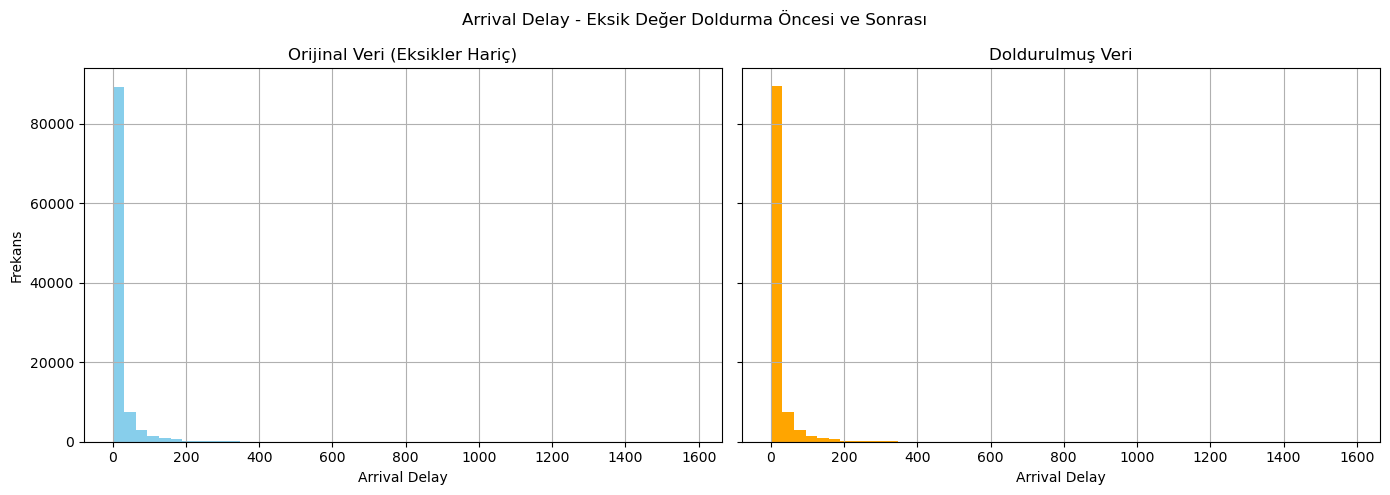

In [20]:
ifig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axes[0].hist(df["Arrival Delay in Minutes"].dropna(), bins=50, color='skyblue')
axes[0].set_title("Orijinal Veri (Eksikler Hariç)")
axes[0].set_xlabel("Arrival Delay")
axes[0].set_ylabel("Frekans")
axes[0].grid(True)

axes[1].hist(df_filled["Arrival Delay in Minutes"], bins=50, color='orange')
axes[1].set_title("Doldurulmuş Veri")
axes[1].set_xlabel("Arrival Delay")
axes[1].grid(True)

plt.suptitle("Arrival Delay - Eksik Değer Doldurma Öncesi ve Sonrası")
plt.tight_layout()
plt.show()


In [21]:
#Dağılım yapısal olarak değişmemiş.
#Eksik değer doldurma işlemi, veriye belirgin bir bozulma veya sapma getirmemiş.
#Doldurulan değerler, var olan dağılımla uyumlu şekilde entegre olmuş.

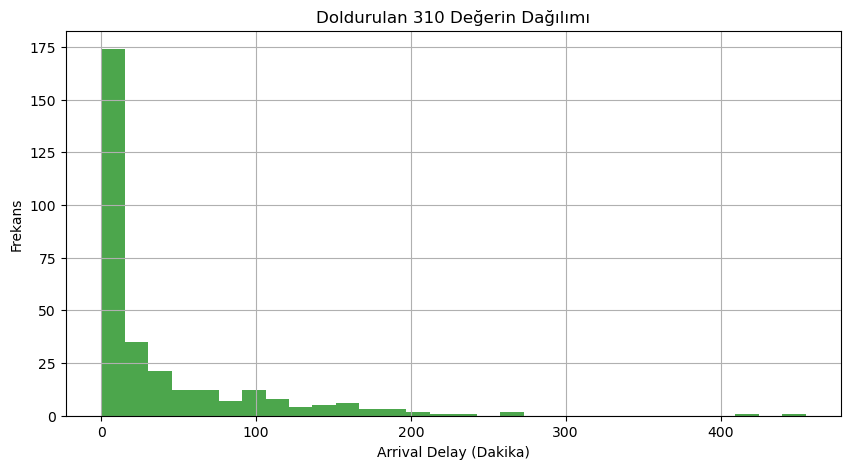

In [22]:
import matplotlib.pyplot as plt

# Orijinal veride eksik olan satırların index'lerine bakalım
missing_indices = df["Arrival Delay in Minutes"].isna()

# Bu satırların doldurulmuş hali (df_filled içinden)
filled_values = df_filled.loc[missing_indices, "Arrival Delay in Minutes"]

# Histogram çizimi
plt.figure(figsize=(10, 5))
plt.hist(filled_values, bins=30, color="green", alpha=0.7)
plt.title("Doldurulan 310 Değerin Dağılımı")
plt.xlabel("Arrival Delay (Dakika)")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()


In [23]:
#310 değerin neredeyse yarıdan fazlası 0–25 dakika aralığında görünüyor.
#Bu, genel veri setindeki dağılımla uyumlu, özellikle 400+ dakikaya kadar ulaşan birkaç değer var.Bunlar analizde göz önünde bulundurulmalı.

# Görselleştirme

In [24]:
# Sayısal değişkenler
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Kategorik değişkenler
categorical_columns = df.select_dtypes(include='object').columns.tolist()

print("Sayısal Değişkenler:", numerical_columns)
print("\nKategorik Değişkenler:", categorical_columns)


Sayısal Değişkenler: ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

Kategorik Değişkenler: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


### Sayısal Değişkenler Analizi


Veri setinde bazı sütunlar istatistiksel olarak anlamlı olmadığı için analiz dışında bırakılmıştır. Örneğin:
- Unnamed: 0 → Sıra numarasıdır, çıkarılmıştır.
- id → Yolcu kimliğini gösterir, analiz için anlamlı değildir.

**Sayısal değişkenler**:
- Age: Yolcunun yaşı
- Flight Distance: Uçuş mesafesi
- Departure Delay in Minutes: Kalkış gecikmesi süresi
- Arrival Delay in Minutes: Varış gecikmesi süresi

**Ordinal kategorik değişkenler** (1–5 arası puanlama):
- Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking,
- Gate location, Food and drink, Online boarding, Seat comfort,
- Inflight entertainment, On-board service, Leg room service,
- Baggage handling, Checkin service, Inflight service, Cleanliness

**Kategorik değişkenler**:
- Gender, Customer Type, Type of Travel, Class, satisfaction


In [25]:
histogram_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


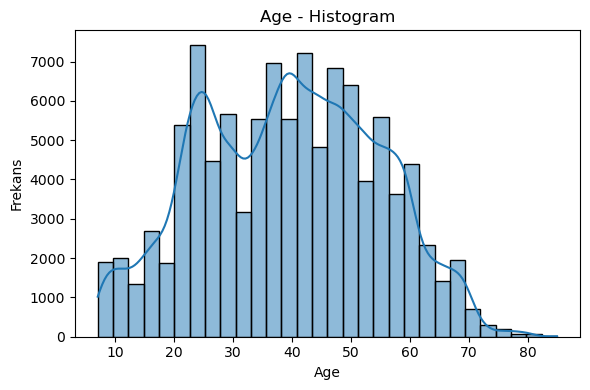

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


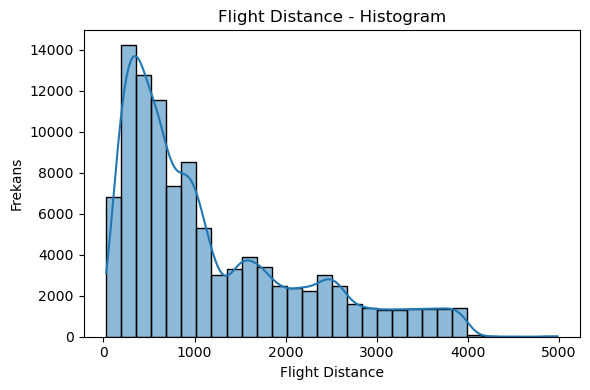

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


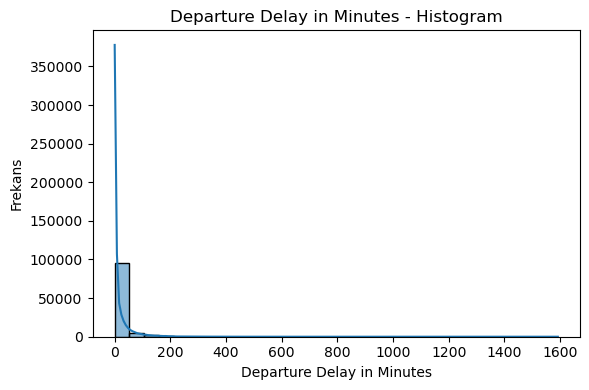

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


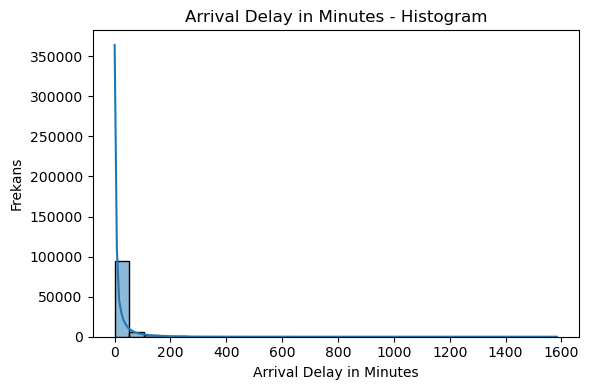

In [26]:
for col in histogram_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f"{col} - Histogram")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.tight_layout()
    plt.show()

- `Age` sütununun histogram grafiği incelendiğinde, dağılımın normal dağılıma oldukça yakın olduğu görülmektedir. En yoğun yaş grubu 20–60 arasında yer almakta olup, en yüksek frekans 25–30 yaş aralığındadır.

- `Flight Distance` sütunu sağa çarpık bir dağılım göstermektedir. En yüksek frekans, 0–1000 km arasındaki kısa mesafeli uçuşlarda gözlenmiştir. Uçuş mesafesi arttıkça yolcu sayısı azalmaktadır. 4000 km üzeri uçuşlar nadiren gerçekleşmiştir.

- `Departure Delay in Minutes` sütunu da sağa çarpık bir dağılım sergilemektedir. En yoğun yığılma 0 dakikada gözlenmiştir. Gecikmelerin büyük kısmı 0–50 dakika arasında yoğunlaşmış, 100 dakikadan sonra frekans neredeyse sıfırlanmıştır.

- `Arrival Delay in Minutes` değişkeninin dağılımı da benzer şekilde sağa çarpıktır. En yüksek frekans yine 0 dakikadadır, bu da uçuşların büyük bir kısmının zamanında varış yaptığını göstermektedir. Ancak aşırı gecikmiş bazı uçuşlar da mevcuttur ve bu durum dağılımı bozmuştur.


### Ordinal Kategorikler Analizi

In [27]:
rating_cols = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]



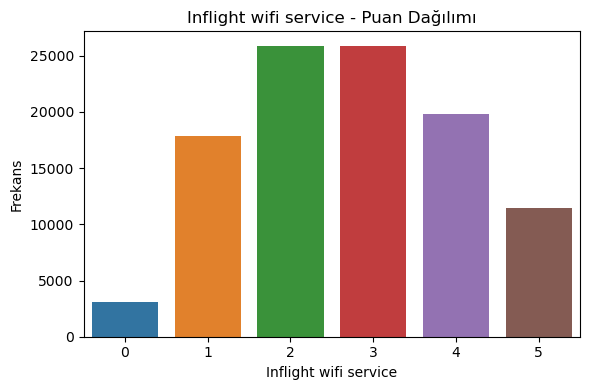

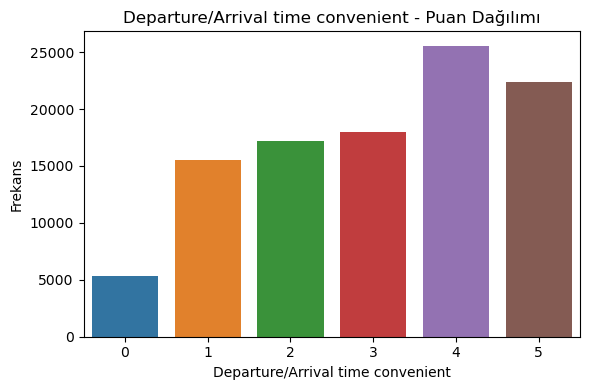

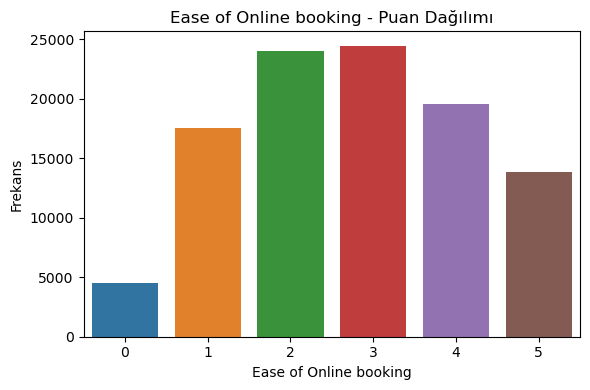

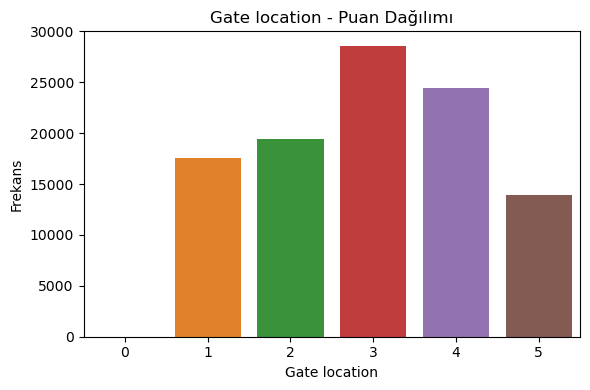

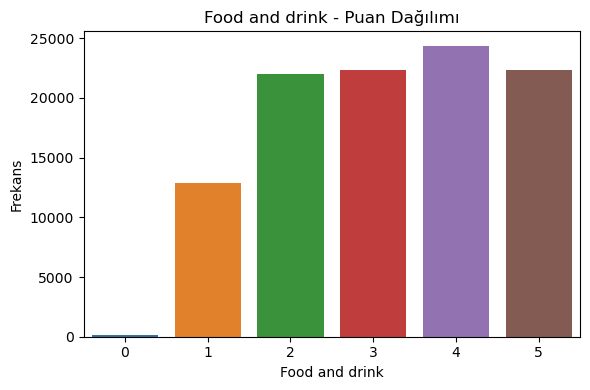

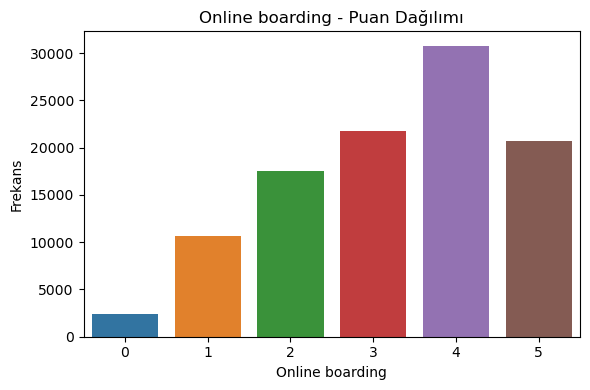

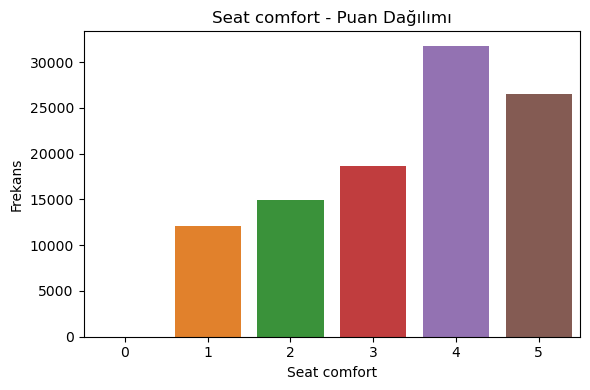

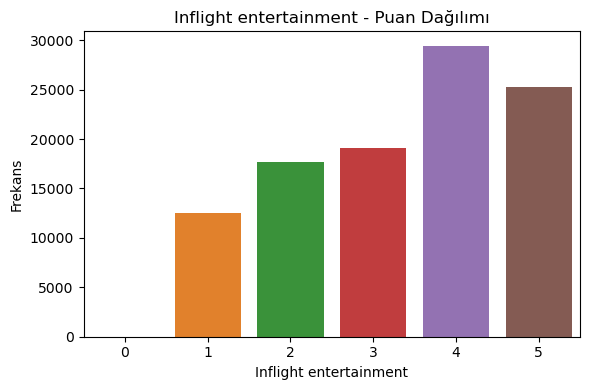

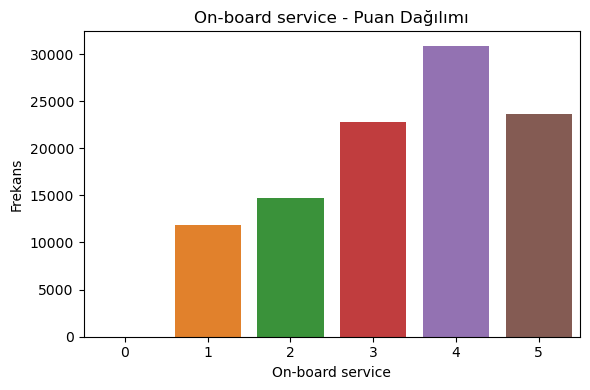

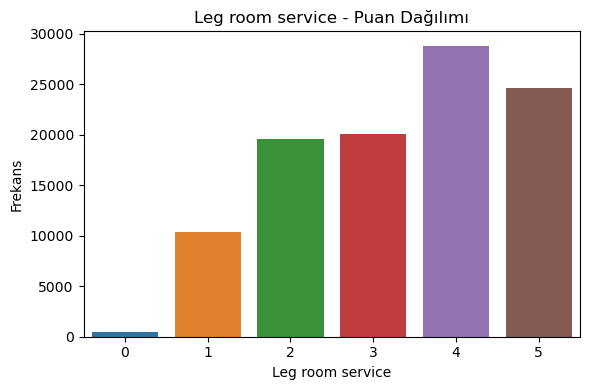

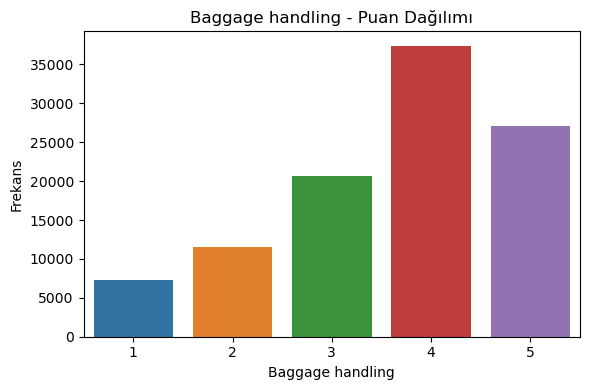

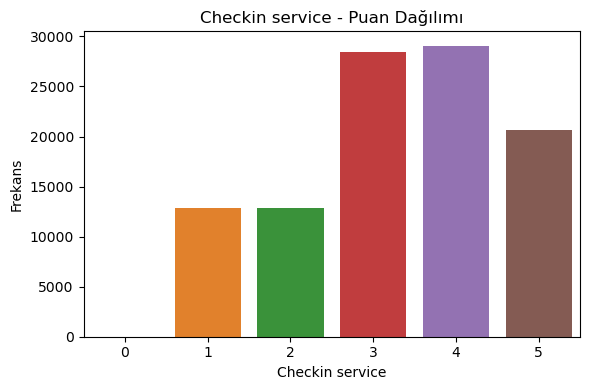

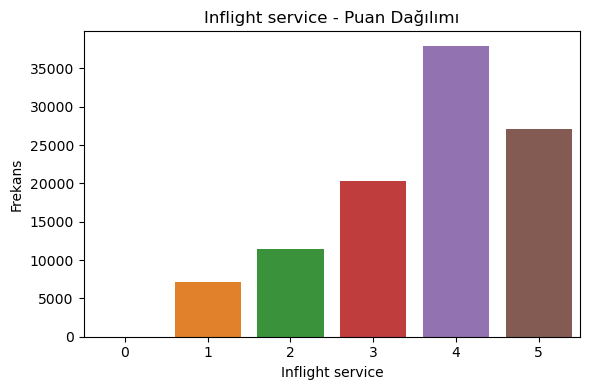

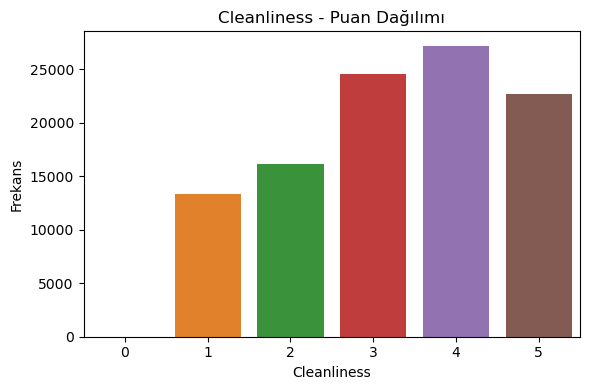

In [28]:
for col in rating_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=sorted(df[col].dropna().unique()))
    plt.title(f"{col} - Puan Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.tight_layout()
    plt.show()

- `Inflight wifi service` bar grafiği incelendiğinde, puanların 2 ve 3 değerlerinde yoğunlaştığı görülmektedir. Bu durum, memnuniyetin orta-alt seviyede olduğunu göstermektedir. 0 ve 1 puanlar da dikkat çekici düzeydedir; 0 puan verenler bu hizmeti almamış olabilirken, 1 puan verenler hizmetten memnun kalmamış görünmektedir. 5 puan verenlerin sayısı ise 1 puan verenlerden daha azdır, yani Wi-Fi hizmetinden çok memnun kalan yolcu sayısı oldukça sınırlıdır.

- `Departure/Arrival time convenient` bar grafiğinde en yüksek frekans 4 puanda gözlenmiş, bunu 5 puan takip etmiştir. Bu da yolcuların zaman planlamasından genel olarak memnun olduğunu göstermektedir. 0 ve 1 puan veren az sayıda yolcu, ileri saatli veya bağlantılı uçuşlar nedeniyle zamanlama sorunları yaşamış olabilir.

- `Ease of Online Booking` değişkeninde en sık verilen puanlar 2 ve 3’tür. Bu da kullanıcı deneyiminin ortalama düzeyde olduğunu gösterir. Özellikle 1 puan veren 17.000’e yakın yolcu olması, bazı yolcuların bu süreçten ciddi şekilde rahatsızlık duyduğunu göstermektedir.

- `Gate Location` değerlendirmelerinde 3 ve 4 puanlar öne çıkmaktadır. 0 puan verilmemiş olması, hizmetin asgari düzeyde tatmin edici olduğunu göstermektedir. Ancak 1 ve 2 puan verenlerin sayısı da az değildir, bu da bazı yolcular için kapıya ulaşımda zorluk yaşandığını düşündürmektedir.

- `Food and Drink` puanlamasında en yüksek değerler 3, 4 ve 5’tir; bu da genel memnuniyetin iyi olduğunu gösterir. 0 puan neredeyse yoktur. Ancak 1 ve 2 puan veren yolcuların sayısı oldukça fazladır (35.000’den fazla); bu da bazı kişilerin yemek kalitesi veya sunumdan memnun olmadığını göstermektedir.

- `Online Boarding` en çok 4 puan almıştır. Genel olarak olumlu değerlendirilse de, 0 ve 1 puan veren yaklaşık 13.000 yolcu, sistemsel eksiklikler ya da kullanım sorunları yaşamış olabilir. Bu alanda iyileştirme yapılması faydalı olacaktır.

- `Seat Comfort` değişkeni için en yüksek frekans 4 ve 5 puandadır. Bu, yolcuların büyük bölümünün koltuk konforundan memnun olduğunu gösterir. Yine de 0–2 puan veren yaklaşık 27.000 yolcu bulunmaktadır; bu da ergonomi veya diz mesafesi gibi konularda geliştirme yapılabileceğine işaret eder.

- `Inflight Entertainment` değerlendirmelerinde 4 puan öne çıkmaktadır. 56.000'in üzerinde yolcu 4 veya 5 puan vermiştir. 0 puan sayısı oldukça düşüktür. Ancak 1–2 puan veren 29.000 kişi, içerik kalitesi veya erişim gibi sorunlar yaşamış olabilir.

- `On-board Service` için yolcuların %50’den fazlası 4 veya 5 puan vererek yüksek memnuniyet göstermiştir. 1–2 puan veren yaklaşık 27.000 kişi ise bazı uçuşlarda hizmette eksiklikler yaşandığını düşündürmektedir. Genel olarak başarılı olsa da, standartların artırılması şikayet oranını azaltabilir.

- `Leg Room Service` değişkeninde yolcuların yarısından fazlası 4–5 puan vererek genel bir memnuniyet belirtmiştir. Ancak yaklaşık 29.000 kişi 1–2 puan vermiştir; bu da bacak mesafesinin pek çok yolcu için hala yetersiz olduğunu göstermektedir.

- `Baggage Handling` için yaklaşık 66.000 kişi yüksek (4–5) puan vermiştir. Ancak yaklaşık 18.000 kişi düşük puan vererek bu alanda iyileştirme fırsatlarının olduğunu ortaya koymuştur.

- `Check-in Service` değerlendirmelerinde 3 ve 4 puanlar yüksek frekansta yer almaktadır. Yaklaşık 20.000 kişi 5 puan verirken, toplamda 51.000 kişi 4 veya 5 puanla memnuniyet bildirmiştir. 1–2 puan verenlerin oranı ise %25’e yakın olup bu hizmetin ortalama düzeyde karşılandığını göstermektedir.

- `Inflight Service` değişkeni için 4 ve 5 puan veren yaklaşık 67.000 yolcu yüksek memnuniyet göstermektedir. Ancak 1–2 puan veren 20.000 kişi de bulunmaktadır; bu, hizmet kalitesinin tüm uçuşlarda standart olmayabileceğini göstermektedir.

- `Cleanliness` değerlendirmelerinde 50.000’den fazla kişi 4–5 puan vererek yüksek memnuniyet bildirmiştir. Yine de 1–2 puan verenlerin oranı %25 civarındadır; bu da temizlik kalitesinin her uçuşta eşit düzeyde olmadığını düşündürmektedir.


### Kategorik değişkenler analizi


### Kategorik Değişkenler: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


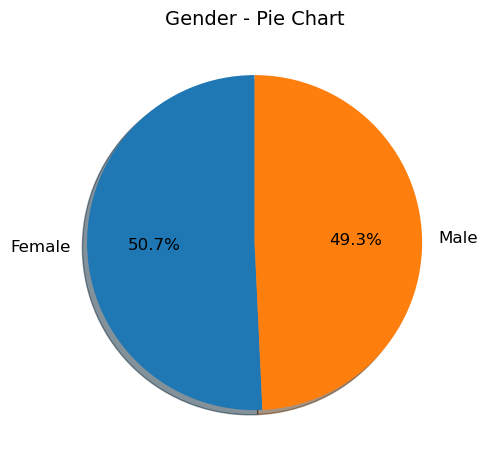

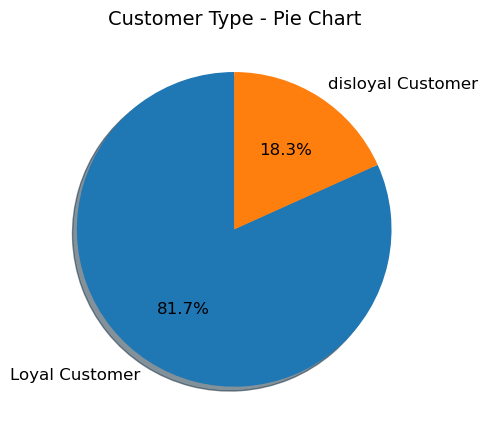

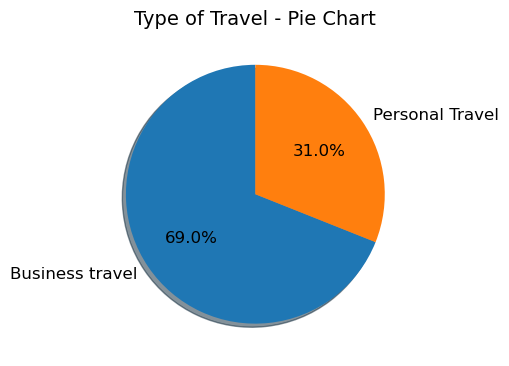

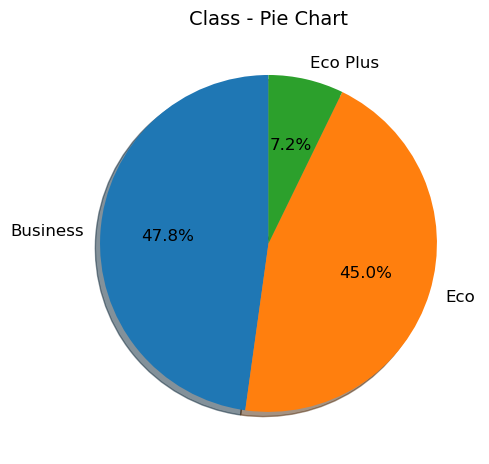

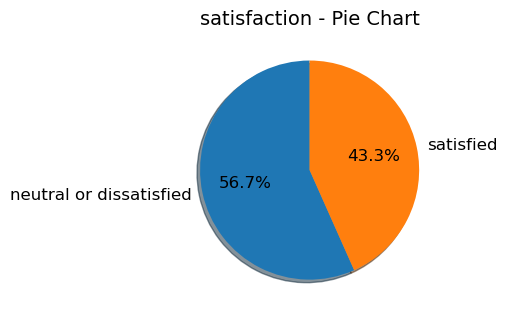

In [99]:
for col in categorical_columns:
    plt.figure(figsize=(5, 5))
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        textprops={'fontsize': 12}
    )
    plt.title(f"{col} - Pie Chart", fontsize=14)
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

Yolcuların cinsiyet dağılımına baktığımızda kadın yolcuların oranı %50.75, erkek yolcuların oranı ise %49.25’tir. Kadın ve erkek yolcu sayısı neredeyse eşittir.

Müşteri türü açısından bakıldığında, yolcuların %81.73’ü sadık (loyal) müşterilerden, %18.27’si ise sadık olmayan (disloyal) müşterilerden oluşmaktadır. Verinin büyük çoğunluğunu sadık müşteriler oluşturmaktadır.

Seyahat türü dağılımında ise yolcuların %68.96’sı iş seyahati (business travel), %31.04’ü ise kişisel seyahat (personal travel) gerçekleştirmiştir. Yani yolcuların yaklaşık %69’u iş amaçlı seyahat etmektedir.

Uçuş sınıfı dağılımı incelendiğinde, %47.80 oranında Business Class, %44.99 oranında Economy Class ve %7.21 oranında Eco Plus sınıfı tercih edilmiştir. Business ve Economy sınıfları oldukça dengelidir; Eco Plus ise daha küçük bir yolcu grubuna hitap etmektedir.

Memnuniyet durumuna baktığımızda, yolcuların %43.33’ü memnun (satisfied), %56.67’si ise nötr ya da memnun değil (neutral or dissatisfied) olarak değerlendirilmiştir. Memnun olmayan yolcu oranının daha yüksek olması, müşteri deneyimi ve hizmet kalitesi açısından dikkatle ele alınması gereken bir durumdur.


# Aykırı Değer Analizi

### Age

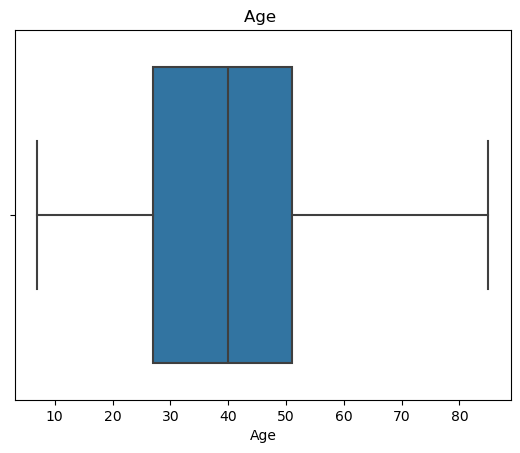

In [30]:
sns.boxplot(x=df['Age'])
plt.title("Age ")
plt.show()


Yaş değişkenine ilişkin boxplot incelendiğinde, veri kümesinin 8 ile 85 yaş aralığında dağıldığı ve medyan yaşın yaklaşık 40 olduğu görülmektedir. Alt %25’lik grup (Q1) 30 yaşın altında, üst %25’lik grup (Q3) ise 50 yaşın üzerindedir. Grafik üzerinde istatistiksel olarak aykırı bir değer tespit edilmemiştir. Bu da yaş verisinin dengeli dağıldığını ve analizlerde güvenle kullanılabileceğini göstermektedir.


### Flight Distance

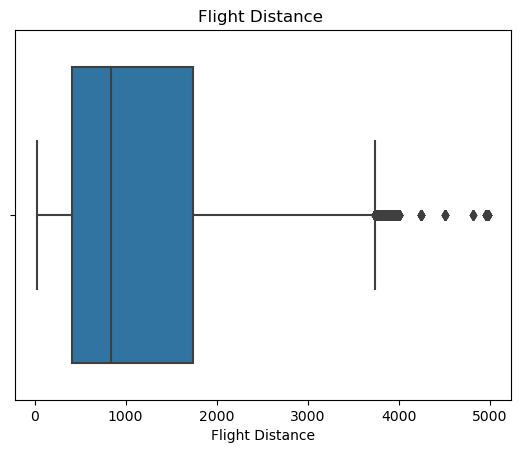

In [31]:
sns.boxplot(x=df['Flight Distance'])
plt.title("Flight Distance ")
plt.show()

Flight Distance değişkenine ait boxplot incelendiğinde, medyan uçuş mesafesinin yaklaşık 900–1000 km civarında olduğu görülmektedir. Bu durum, uçuşların yarısından fazlasının 1000 km’nin altında gerçekleştiğini ve verinin büyük kısmının kısa ve orta mesafeli uçuşlardan oluştuğunu göstermektedir. Kutu (IQR) genişliği oldukça büyüktür; bu da alt %25’lik dilim ile üst %25’lik dilim arasında ciddi fark olduğunu ve uçuş mesafelerinin oldukça değişken olduğunu göstermektedir. 4000–5000 km arasındaki uçuşlar aykırı değerler olarak grafikte yer almakta ve bu uçuşların kıtalar arası olabileceği düşünülmektedir. Dolayısıyla uçuş mesafeleri geniş bir dağılım sergilemektedir.


In [32]:
# IQR yöntemi ile aykırı değer tespiti
Q1 = df["Flight Distance"].quantile(0.25)
Q3 = df["Flight Distance"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Flight Distance"] < lower_bound) | (df["Flight Distance"] > upper_bound)]
print("Aykırı Değer Sayısı:", outliers.shape[0])

Aykırı Değer Sayısı: 2291


In [33]:
#Aykırı değerler dahil.
df["Flight Distance"].mean()

1189.4483754234677

In [34]:
filtered_df = df[(df["Flight Distance"] >= lower_bound) & (df["Flight Distance"] <= upper_bound)]

# Aykırı değerler hariç ortalama
filtered_df["Flight Distance"].mean()


1128.6325371753614

Aykırı değerler, uçuş mesafesi değişkeninde ortalamayı yaklaşık 61 km yukarı çekmiştir. Ancak bu aykırı değerler, uzun mesafeli uçuşları temsil ettiğinden verinin önemli bir parçasını oluşturmaktadır. Bu nedenle analiz sürecine dahil edileceklerdir.


### Departure Delay in Minutes

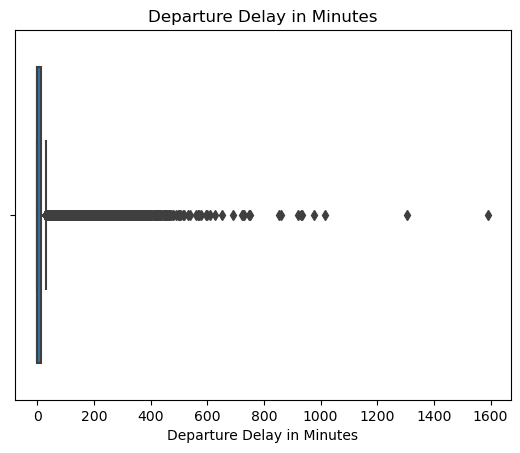

In [35]:
sns.boxplot(x=df['Departure Delay in Minutes'])
plt.title("Departure Delay in Minutes")
plt.show()

Departure Delay in Minutes değişkenine ait boxplot incelendiğinde, medyan gecikme süresinin yaklaşık 0 dakika olduğu görülmektedir. Bu durum, uçuşların %50’den fazlasının ya hiç gecikmediğini ya da çok kısa gecikmeler yaşadığını göstermektedir. Alt %25'lik grup ile üst %25'lik grup arasındaki gecikmelerin genellikle 0–10 dakika aralığında yoğunlaştığı anlaşılmaktadır. Minimum değer 0, maksimum değer ise 1600 dakika olarak belirlenmiştir. Özellikle 100 dakika ve üzerindeki gecikmeler aykırı değer olarak öne çıkmakta ve bu değerler ortalamayı ciddi şekilde yukarı çekmektedir. Bu nedenle, analizlerde medyan değere odaklanılacak ve bu uç değerler ayrı olarak ele alınacaktır.


In [36]:
#Aykırı değerleri çıkartıyorum.
# Departure delay'de aykırı değer analizi
departure_delay = df["Departure Delay in Minutes"].dropna()

# IQR yöntemi
Q1 = departure_delay.quantile(0.25)
Q3 = departure_delay.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı ve normal değerler
outliers_1 = departure_delay[(departure_delay < lower_bound) | (departure_delay > upper_bound)]
non_outliers_1 = departure_delay[(departure_delay >= lower_bound) & (departure_delay <= upper_bound)]

# Sonuç
print(f"Aykırı değer sayısı: {outliers_1.count()}")
print(f"Aykırı olmayan değer sayısı: {non_outliers_1.count()}")


Aykırı değer sayısı: 14529
Aykırı olmayan değer sayısı: 89375


In [37]:
print(f"Tüm verinin ortalaması: {departure_delay.mean():.2f} dakika")
print(f"Aykırı değerler hariç ortalama: {non_outliers_1.mean():.2f} dakika")


Tüm verinin ortalaması: 14.82 dakika
Aykırı değerler hariç ortalama: 3.72 dakika


Departure Delay değişkeninde yer alan aykırı değerler, ortalamayı neredeyse 4 katına çıkarmıştır. Bu durum verinin oldukça sağa çarpık bir dağılıma sahip olduğunu göstermektedir. Böyle bir dağılımda ortalama, merkezi eğilim ölçüsü olarak yanıltıcı olabilir. Bu nedenle, analizlerde genel olarak ortalama (mean) yerine medyan (median) kullanılacaktır. Özellikle gecikme bazlı karşılaştırmalarda medyan değere odaklanılacaktır.


In [38]:
print("Departure Delay Ortalaması:", departure_delay.mean())
print("Departure Delay Medyanı:", departure_delay.median())

Departure Delay Ortalaması: 14.815618263012011
Departure Delay Medyanı: 0.0


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


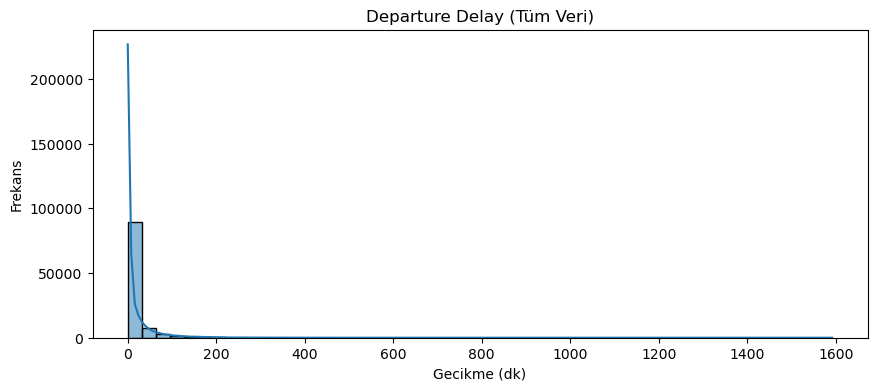

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


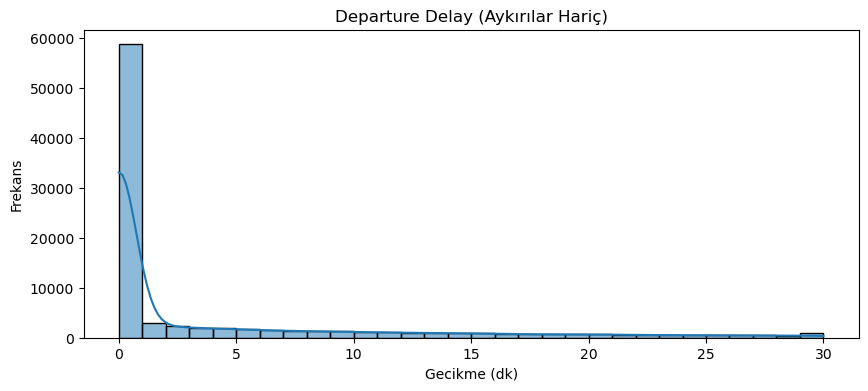

In [39]:
# Histogram - Aykırılar dahil
plt.figure(figsize=(10, 4))
sns.histplot(departure_delay, bins=50, kde=True)
plt.title("Departure Delay (Tüm Veri)")
plt.xlabel("Gecikme (dk)")
plt.ylabel("Frekans")
plt.show()

# Histogram - Aykırılar hariç
plt.figure(figsize=(10, 4))
sns.histplot(non_outliers_1, bins=30, kde=True)
plt.title("Departure Delay (Aykırılar Hariç)")
plt.xlabel("Gecikme (dk)")
plt.ylabel("Frekans")
plt.show()

Departure Delay değişkenine ait histogram grafiği incelendiğinde, gecikmelerin büyük çoğunluğunun 0–50 dakika arasında toplandığı görülmektedir. Dağılım sağa çarpık yapıdadır ve gecikmeler 1600 dakikaya kadar çıkabilmektedir. Bu uç değerler, grafiğin genel görünümünü bozmakta ve dağılımı dengesiz göstermektedir. Aykırı değerler hariç tutulduğunda ise, en yüksek frekans 0.0–1.0 dakika aralığında gözlemlenmektedir. Bu durum, uçuşların büyük kısmının ya zamanında kalktığını ya da yalnızca çok kısa sürelerle geciktiğini göstermektedir. 5 dakikanın üzerindeki gecikmeler oldukça seyrektir; dolayısıyla yolcuların büyük çoğunluğu önemli bir gecikme yaşamamaktadır.


### Arrival Delay in Minutes

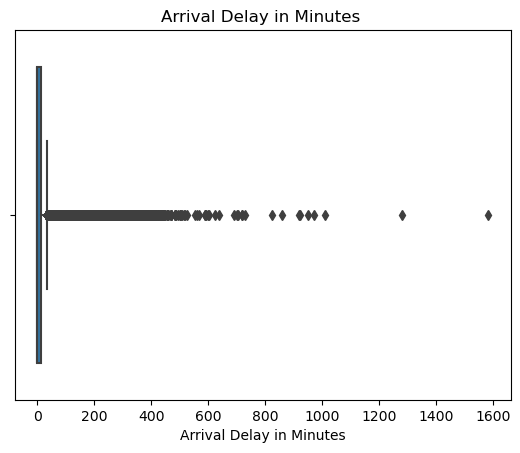

In [40]:
sns.boxplot(x=df['Arrival Delay in Minutes'])
plt.title("Arrival Delay in Minutes ")
plt.show()

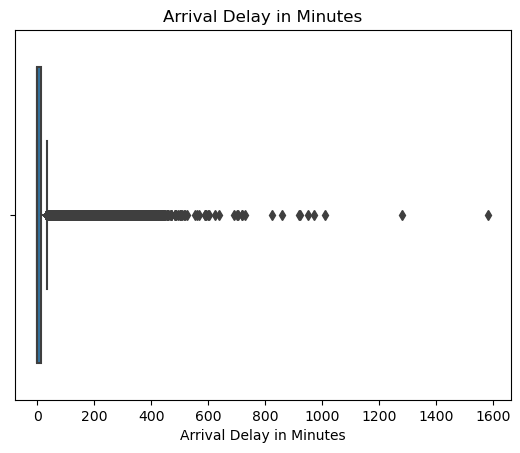

In [41]:
sns.boxplot(x=df_filled['Arrival Delay in Minutes'])
plt.title("Arrival Delay in Minutes")
plt.show()

Verinin büyük çoğunluğu düşük gecikme aralığında toplanmışken, bazı uçuşlar ekstrem gecikmelerle dikkat çekmektedir. Arrival Delay değişkeninde medyan gecikme süresi yaklaşık 0 dakikadır, bu da uçuşların %50’den fazlasının zamanında veya neredeyse zamanında varış yaptığını göstermektedir. Alt ve üst çeyrek dilimler 0–10 dakika aralığındadır. Minimum gecikme 0, maksimum gecikme ise yaklaşık 1600 dakikadır. Özellikle 100 dakikanın üzerindeki gecikmeler aykırı değer olarak değerlendirilmiştir. Bu tür aşırı rötarlı uçuşlar, veri setinde genel ortalamayı önemli ölçüde yukarı çekmekte ve analiz sonuçlarını çarpıtabilmektedir. Bu nedenle, analiz sürecinde medyan gecikme süresi esas alınacak, uç değerler ise ayrı olarak ele alınacaktır.


Arrival delay sütununda yer alan aykırı değerlerin sayısını inceleyeceğiz. Bu sayede gecikmelerin ne kadarının olağan dışı olduğunu ve dağılım üzerindeki etkilerini daha net analiz edebileceğiz.


In [42]:
# Doldurulmuş veriyle çalışıyoruz
arrival_delay_filled = df_filled["Arrival Delay in Minutes"]

# IQR yöntemi
Q1 = arrival_delay_filled.quantile(0.25)
Q3 = arrival_delay_filled.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı ve normal değerleri ayırıyoruz
outliers = arrival_delay_filled[(arrival_delay_filled < lower_bound) | (arrival_delay_filled > upper_bound)]
non_outliers = arrival_delay_filled[(arrival_delay_filled >= lower_bound) & (arrival_delay_filled <= upper_bound)]

# Sonuç
print(f"Aykırı değer sayısı: {outliers.count()}")
print(f"Aykırı olmayan değer sayısı: {non_outliers.count()}")


Aykırı değer sayısı: 14052
Aykırı olmayan değer sayısı: 89852


In [43]:
print(f"Tüm verinin ortalaması: {arrival_delay_filled.mean():.2f} dakika")
print(f"Aykırı değerler hariç ortalama: {non_outliers.mean():.2f} dakika")


Tüm verinin ortalaması: 15.25 dakika
Aykırı değerler hariç ortalama: 4.11 dakika


Arrival Delay in Minutes değişkenine ait analizde, tüm verilerle hesaplanan ortalama gecikme süresi 15.18 dakika iken, aykırı değerler çıkarıldığında bu ortalama 4.11 dakikaya düşmektedir. Bu fark, aykırı değerlerin ortalamayı yaklaşık 3 kat artırdığını göstermektedir. Yani aşırı gecikmeye sahip az sayıda uçuş, veri setinin genel istatistiklerini ciddi şekilde etkilemektedir. Öte yandan, medyan gecikme süresi sadece 4 dakikadır. Bu da uçuşların büyük bir kısmının zamanında ulaştığını gösterir.


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


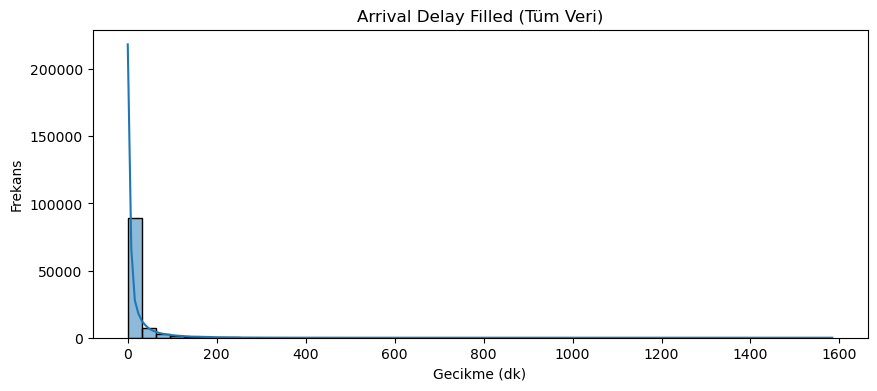

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


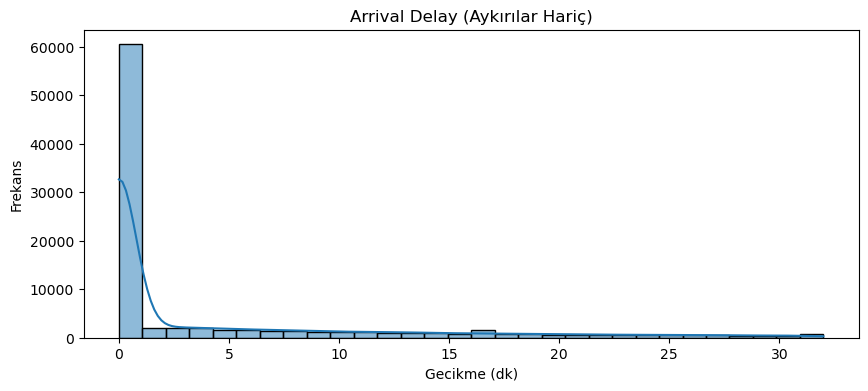

In [44]:
# Histogram - Aykırılar dahil
plt.figure(figsize=(10, 4))
sns.histplot(arrival_delay_filled, bins=50, kde=True)
plt.title("Arrival Delay Filled (Tüm Veri)")
plt.xlabel("Gecikme (dk)")
plt.ylabel("Frekans")
plt.show()

# Histogram - Aykırılar hariç
plt.figure(figsize=(10, 4))
sns.histplot(non_outliers, bins=30, kde=True)
plt.title("Arrival Delay (Aykırılar Hariç)")
plt.xlabel("Gecikme (dk)")
plt.ylabel("Frekans")
plt.show()


Arrival Delay in Minutes değişkenine ait histogram grafiği incelendiğinde, gecikmelerin büyük çoğunluğunun 0–50 dakika arasında toplandığı görülmektedir. Dağılım sağa çarpık bir yapı sergilemektedir ve bazı uçuşlar 1600 dakikaya kadar gecikme yaşamıştır. Bu tür uç değerler, genel dağılımı bozarak ortalamayı da yukarı çekmektedir.

İkinci grafikte, aykırı değerler hariç tutulduğunda, en yüksek frekansın 0.0–1.0 dakika aralığında yoğunlaştığı gözlemlenir. Bu durum, uçuşların çoğunlukla zamanında ya da çok az gecikmeyle gerçekleştiğini göstermektedir. 5 dakikayı aşan gecikmeler oldukça seyrektir; bu da genel yolcu kitlesinin önemli bir gecikme yaşamadığını işaret eder.

Ek olarak, cinsiyete göre hizmet puanlamalarında fark çok küçük olsa da, erkek yolcular uçuş içi hizmetleri biraz daha yüksek puanlamıştır.


# Değişkenler Arası İlişkisel Analiz

### Gender

Gender  satisfaction           
Female  neutral or dissatisfied    57.262882
        satisfied                  42.737118
Male    neutral or dissatisfied    56.052524
        satisfied                  43.947476
Name: proportion, dtype: float64


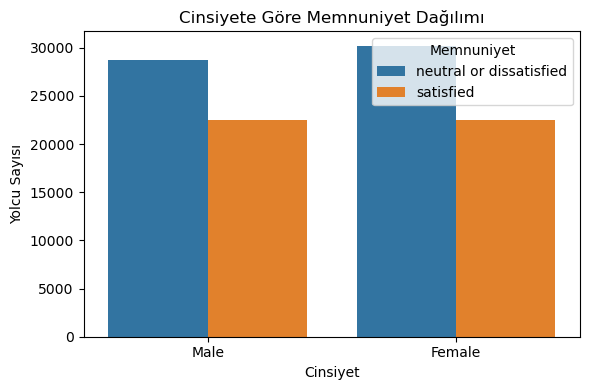

In [45]:
# 1. Cinsiyete göre memnuniyet oranı
print(df.groupby("Gender")["satisfaction"].value_counts(normalize=True) * 100)
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", hue="satisfaction", data=df)
plt.title("Cinsiyete Göre Memnuniyet Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Yolcu Sayısı")
plt.legend(title="Memnuniyet")
plt.tight_layout()
plt.show()

<Axes: xlabel='Gender', ylabel='Age'>

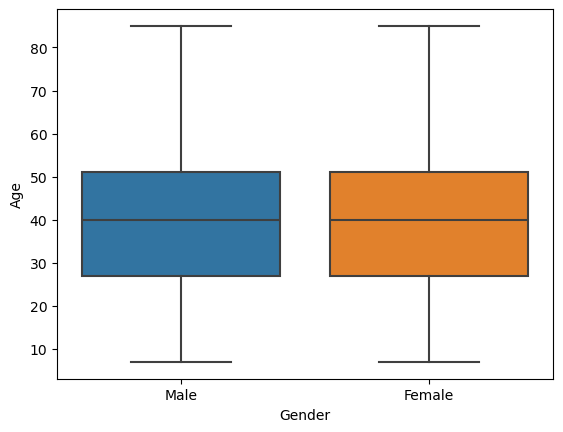

In [46]:
#Cinsiyete göre yaş dağılımı
sns.boxplot(x="Gender", y="Age", data=df)


<Axes: xlabel='Gender', ylabel='Age'>

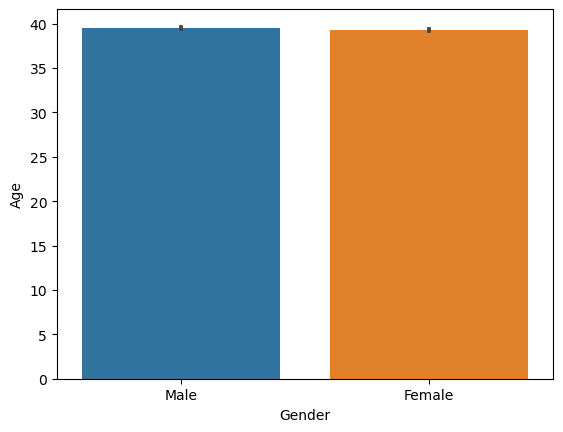

In [47]:
#Cinsiyete göre yaş ortalaması
sns.barplot(x="Gender", y="Age", data=df, estimator="mean")

<Axes: xlabel='Gender', ylabel='Flight Distance'>

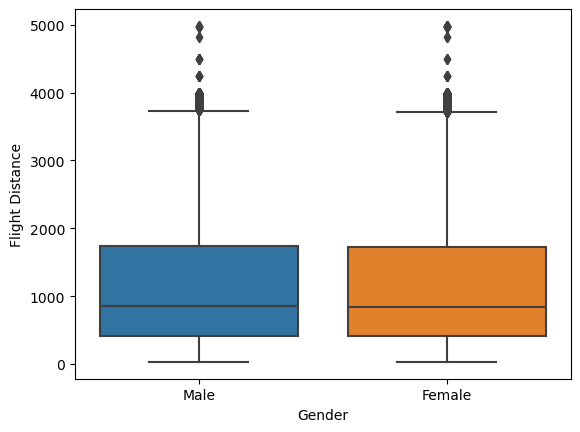

In [48]:
#Gender' a göre Flight Distance 
sns.boxplot(x="Gender", y="Flight Distance", data=df)


<Axes: xlabel='Class', ylabel='count'>

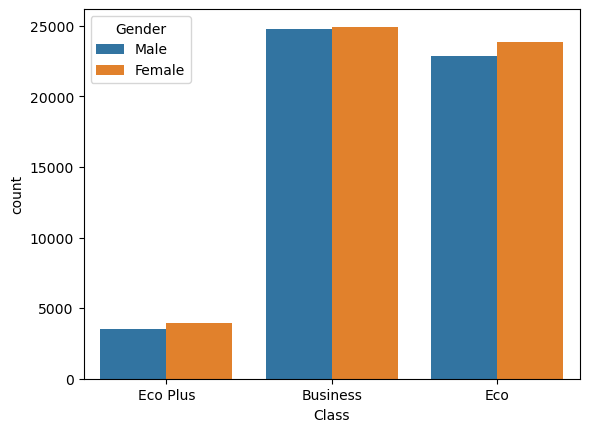

In [49]:
#Cinsiyete göre sınıf dağılımı
sns.countplot(x="Class", hue="Gender", data=df)


<Axes: xlabel='Customer Type', ylabel='count'>

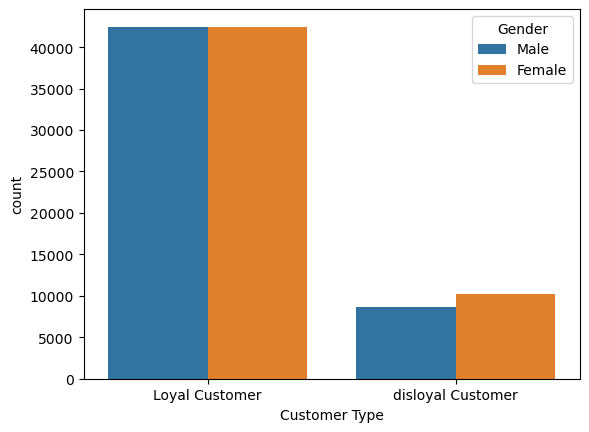

In [50]:
#Cinsiyet_Müşteri tipi İlişkisi
sns.countplot(x="Customer Type", hue="Gender", data=df)


<Axes: xlabel='Type of Travel', ylabel='count'>

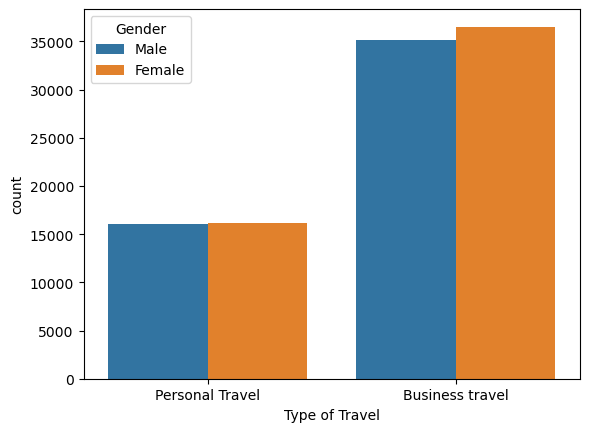

In [51]:
#Gender'a göre Type of Travel
sns.countplot(x="Type of Travel", hue="Gender", data=df)


In [52]:
#Gender'a göre Ortalama hizmet skorları
service_columns = [
    "Inflight wifi service", "Checkin service", "Seat comfort",
    "Inflight entertainment", "Cleanliness", "Inflight service",
    "Departure/Arrival time convenient", "Ease of Online booking", "Gate location",
    "Food and drink", "Online boarding", "On-board service", "Leg room service",
    "Baggage handling"
]


df.groupby("Gender")[service_columns].mean().round(2)


,Inflight wifi service,Checkin service,Seat comfort,Inflight entertainment,Cleanliness,Inflight service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,On-board service,Leg room service,Baggage handling
Gender,,,,,,,,,,,,,,
Female,2.72,3.29,3.47,3.35,3.28,3.59,3.05,2.75,2.98,3.19,3.31,3.37,3.31,3.59
Male,2.74,3.32,3.40,3.37,3.30,3.69,3.07,2.77,2.98,3.21,3.19,3.39,3.39,3.68



### Cinsiyet Değişkenine Göre Genel Gözlemler

- Grafikte, hem erkek hem kadın yolcular arasında **“neutral or dissatisfied”** oranı, **“satisfied”** oranından daha yüksektir. Ancak cinsiyete göre memnuniyet dağılımı anlamlı bir fark göstermemektedir.

- Kadın ve erkek yolcuların yaş dağılımı benzerdir. Her iki grupta da **medyan yaş yaklaşık 40** civarındadır. Genç ve yaşlı yolcular her iki cinsiyette de bulunmaktadır.

- Uçuş mesafesi açısından da cinsiyetler arasında fark bulunmamaktadır. **Medyan mesafe yaklaşık 900 km**’dir. Uçuş mesafeleri her iki grupta da 5000 km’ye kadar yayılmıştır. **4000 km üzeri uçuşlar**, her iki cinsiyette de **outlier** olarak görülmektedir.

- Uçuş sınıfı tercihleri açısından, hem kadın hem erkek yolcular için en yaygın tercihler sırasıyla:
  **Business Class > Economy Class > Eco Plus** şeklindedir. Tüm sınıflarda kadın yolcu sayısı az da olsa fazladır.

- **Sadık müşteri (Loyal Customer)** oranı, kadın ve erkek yolcular arasında neredeyse eşittir. Bu durum, havayolu şirketinin her iki cinsiyette de müşteri bağlılığını başarıyla sağladığını göstermektedir.

- **Disloyal Customer** grubunda ise **kadın yolcu sayısı** erkeklerden biraz daha fazladır. Yani kadınlar arasında sadık olmayan müşteri oranı biraz daha yüksektir.

- **Seyahat türü** açısından her iki cinsiyette de açık ara en yaygın olan tür **Business Travel**’dır. Kadın yolcular bu grupta biraz daha fazla temsil edilmektedir. **Personal Travel** oranları ise kadın ve erkek yolcular arasında oldukça dengelidir.

- Hizmet değerlendirmelerine bakıldığında, kadın ve erkek yolcuların verdiği **ortalama puanlar oldukça benzerdir**. Farkların çoğu **0.01–0.09** aralığında olup, bu düzeydeki farklar istatistiksel olarak anlamlı kabul edilmemektedir.


### Age

Class
Business    41.574328
Eco         37.164253
Eco Plus    38.654524
Name: Age, dtype: float64


<Axes: xlabel='Class', ylabel='Age'>

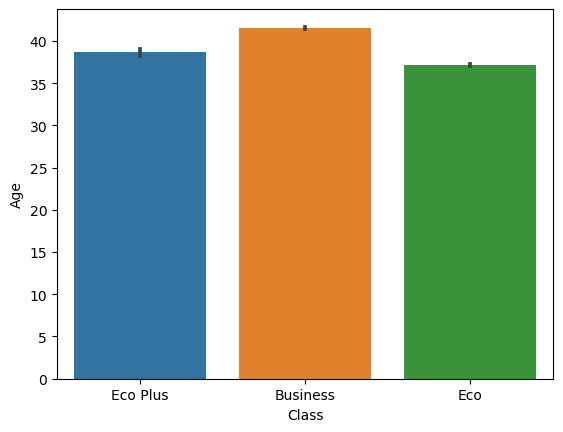

In [53]:
# Sınıflara göre yaş ortalaması
print(df.groupby("Class")["Age"].mean())

sns.barplot(x="Class", y="Age", data=df, estimator="mean")



In [54]:
# Yaş grupları
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[0, 25, 40, 60, float('inf')],
                         labels=['Genç', 'Orta Genç', 'Yetişkin', 'Yaşlı'])


In [55]:
df['Age_Group'].value_counts().sort_index()


Age_Group
Genç         22613
Orta Genç    31347
Yetişkin     41968
Yaşlı         7976
Name: count, dtype: int64

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Flight Distance', ylabel='Age_Group'>

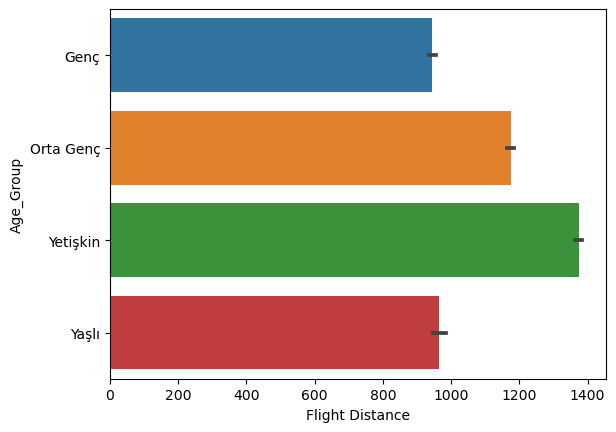

In [56]:
sns.barplot(x="Flight Distance", y="Age_Group", data=df, estimator="mean")

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_Group', ylabel='count'>

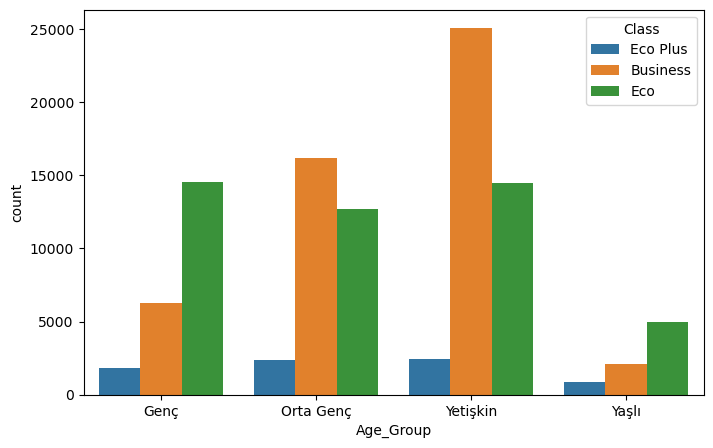

In [57]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', hue='Class', data=df)


C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_Group', ylabel='count'>

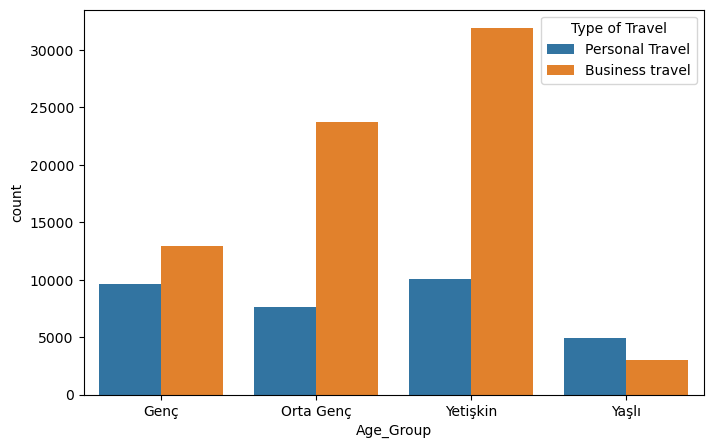

In [58]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', hue='Type of Travel', data=df)


C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_Group', ylabel='count'>

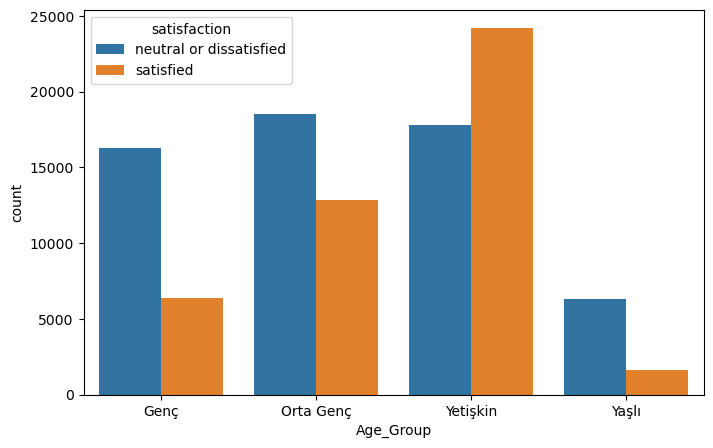

In [59]:
#Yaş Gruplarına göre memnuniyet analizi
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', hue='satisfaction', data=df)


C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_Group', ylabel='count'>

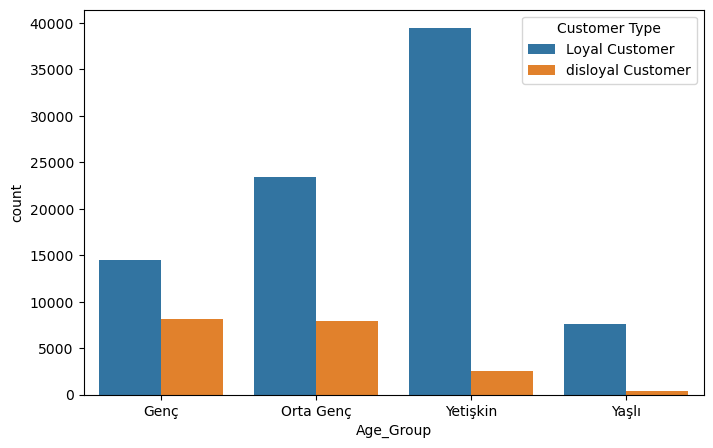

In [60]:
#Yaş Gruplarına göre müşteri analizi
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', hue='Customer Type', data=df)


In [61]:
df.groupby("Age_Group")[service_columns].mean().round(2)

C:\Users\User\AppData\Local\Temp\ipykernel_17444\2302305518.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")[service_columns].mean().round(2)


,Inflight wifi service,Checkin service,Seat comfort,Inflight entertainment,Cleanliness,Inflight service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,On-board service,Leg room service,Baggage handling
Age_Group,,,,,,,,,,,,,,
Genç,2.67,3.22,3.06,3.12,3.12,3.69,2.99,2.69,2.96,3.11,2.78,3.23,3.21,3.68
Orta Genç,2.72,3.25,3.34,3.33,3.26,3.66,2.99,2.74,2.99,3.22,3.10,3.33,3.32,3.64
Yetişkin,2.79,3.42,3.74,3.55,3.43,3.66,3.09,2.83,2.98,3.27,3.64,3.55,3.52,3.66
Yaşlı,2.59,3.16,3.35,3.10,3.10,3.33,3.35,2.65,2.94,3.09,3.16,3.14,2.99,3.31


C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_Group', ylabel='Seat comfort'>

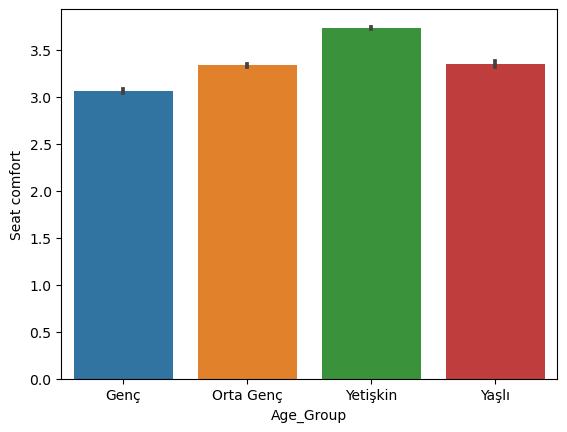

In [62]:
#yaş gruplarına göre Seat comfort service
sns.barplot(x='Age_Group', y='Seat comfort', data=df, estimator='mean')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_Group', ylabel='Inflight entertainment'>

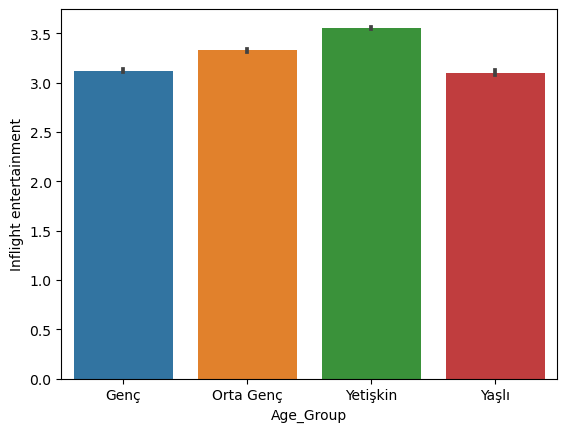

In [63]:
#yaş gruplarına göre Inflight entertainment
sns.barplot(x='Age_Group', y='Inflight entertainment', data=df, estimator='mean')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_Group', ylabel='Leg room service'>

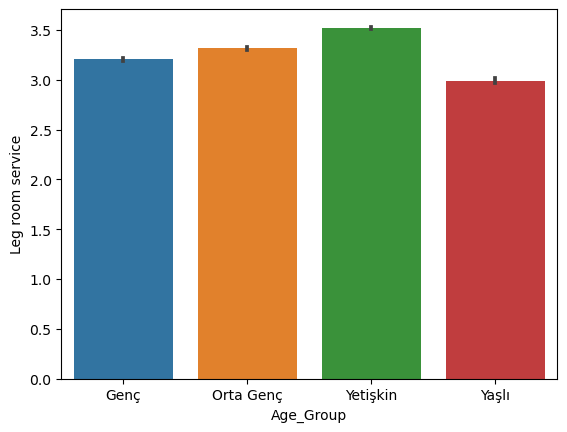

In [64]:
#yaş gruplarına göre Leg room service
sns.barplot(x='Age_Group', y='Leg room service', data=df, estimator='mean')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_Group', ylabel='Online boarding'>

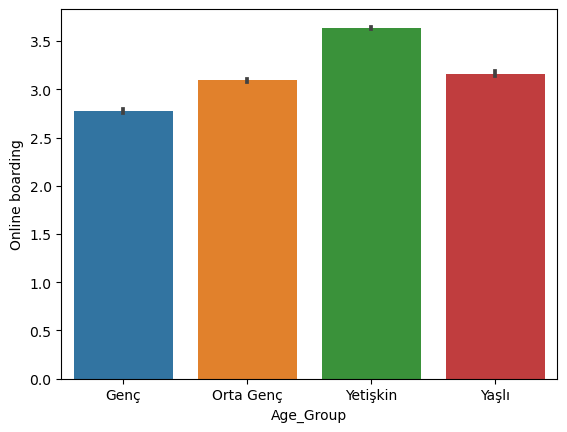

In [65]:

#Yaş gruplarına göre ortalama Online Boarding  memnuniyet skoru
sns.barplot(x='Age_Group', y='Online boarding', data=df, estimator='mean')

### Yaş Gruplarına Göre Yolcu Tercihleri ve Memnuniyet Gözlemleri

- **Business Class yolcuları**, ortalama olarak en yaşlı grubu temsil etmektedir. Buna karşın **Eco sınıfı**, daha çok **genç yolcular** tarafından tercih edilmektedir. Bu durum, bilet fiyatı, konfor beklentisi ve seyahat amacı gibi faktörlerle ilişkilendirilebilir.

- Ortalama **uçuş mesafesi en yüksek** olanlar yetişkin yaş grubundadır. Bu, iş seyahati ya da uzun mesafeli tercihlere bağlı olabilir. **Gençler ve yaşlılar**, genellikle daha kısa uçuşları tercih ediyor olabilir.

- **Eco sınıfı**, en çok genç grupta tercih edilmiştir. Ancak yetişkin ve orta-genç yaş grubunun tercih oranı da yakındır.

- **Eco Plus**, tüm yaş gruplarında en az tercih edilen sınıf olup, özellikle yaşlı yolcular tarafından en az tercih edilen sınıftır.

- **Business sınıfı tercihi**, yaş arttıkça artmaktadır. En çok yetişkin yaş grubu tarafından seçilmektedir.

- **Özetle**: 
  - Genç ve yaşlı yolcular daha çok **Eco sınıfını**,  
  - Orta-genç ve yetişkin yolcular ise daha çok **Business sınıfını** tercih etmektedir.

- **Seyahat türü** açısından bakıldığında, **Business Travel** özellikle orta-genç ve yetişkin gruplarda çok yaygın.  
  **Personal Travel** ise gençler arasında daha fazla; yaşlılar ise iş seyahatine göre kişisel seyahati biraz daha fazla tercih etmektedir.

- **Memnuniyet düzeyi**, yaş gruplarına göre anlamlı farklar göstermektedir.  
  En yüksek memnuniyet **yetişkin grubunda** gözlemlenirken, özellikle **genç** ve **yaşlı gruplarda** memnun olmayan yolcu sayısı daha fazladır.  
  Bu fark, gençlerin yüksek beklentileri ve yaşlıların hizmete erişimde yaşadığı zorluklarla açıklanabilir.

- **Sadakat** açısından da yetişkin grubunun en bağlı grup olduğu görülmektedir.  
  **Genç** ve **orta-genç** yolcular arasında **sadık olmayan müşteri oranı daha yüksektir**.

#### Hizmet Bazlı Memnuniyetler:

- **Seat comfort**: Yetişkinler açık ara en memnun grup, gençlerin puanı daha düşük.
- **Inflight entertainment**: En yüksek puanı yetişkinler verirken, yaşlılar ve gençler daha düşük puanlar vermiştir.
- **Leg room service**: Benzer şekilde yetişkinlerin memnuniyeti daha yüksektir.
- **Online boarding**: En yüksek memnuniyet yetişkin grupta görülürken, **gençler daha düşük puan vermiştir**.  
  Dijital konulara hâkim olmalarına rağmen düşük memnuniyet göstermeleri, beklentilerinin yüksek olmasından kaynaklanıyor olabilir.


### Customer Type

<Axes: xlabel='Customer Type', ylabel='Flight Distance'>

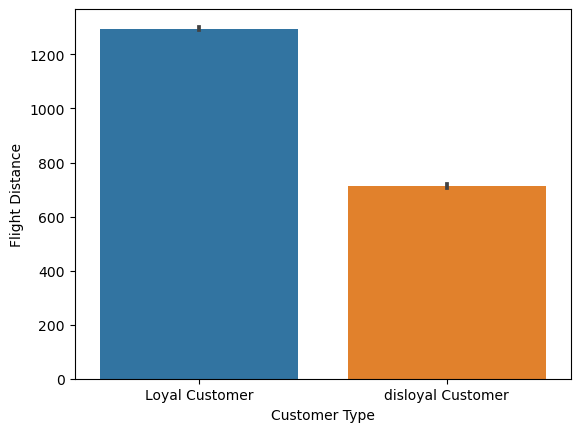

In [66]:
# Customer Type’a göre Flight Distance  ortalaması
sns.barplot(x="Customer Type", y="Flight Distance", data=df, estimator='mean')


<Axes: xlabel='Customer Type', ylabel='count'>

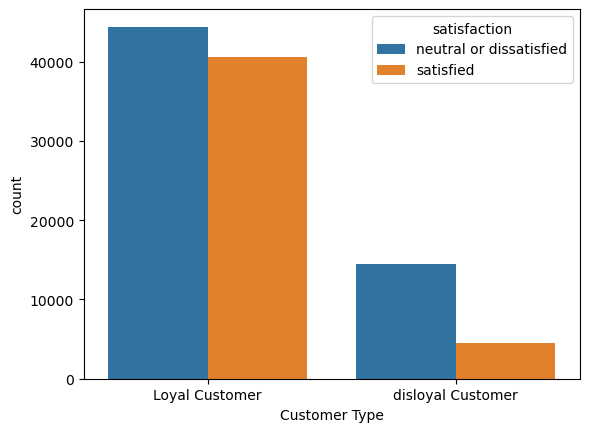

In [67]:
#Müşteri tipine göre memnuniyet dağılımı
sns.countplot(x="Customer Type", hue="satisfaction", data=df)


<Axes: xlabel='Customer Type', ylabel='count'>

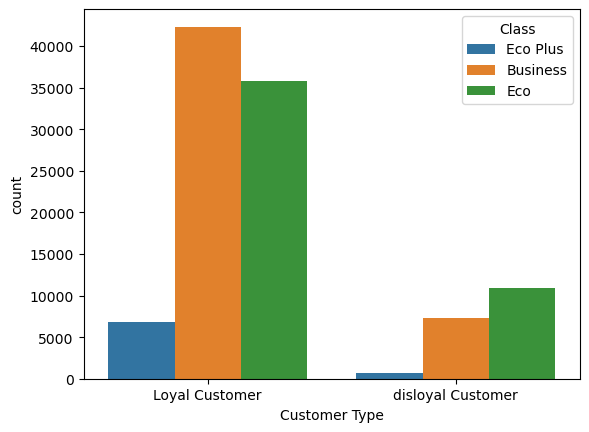

In [68]:
sns.countplot(x="Customer Type", hue="Class", data=df)

<Axes: xlabel='Customer Type', ylabel='count'>

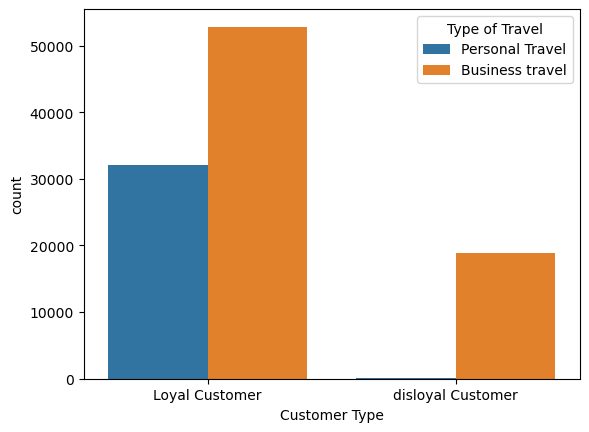

In [69]:
sns.countplot(x="Customer Type", hue="Type of Travel", data=df)

In [70]:
#Müşteri tipine göre Ortalama hizmet skorları

df.groupby("Customer Type")[service_columns].mean().round(2)


,Inflight wifi service,Checkin service,Seat comfort,Inflight entertainment,Cleanliness,Inflight service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,On-board service,Leg room service,Baggage handling
Customer Type,,,,,,,,,,,,,,
Loyal Customer,2.73,3.32,3.54,3.43,3.34,3.63,3.21,2.77,2.97,3.24,3.37,3.42,3.38,3.62
disloyal Customer,2.71,3.22,2.99,3.05,3.05,3.70,2.39,2.70,2.99,3.03,2.71,3.23,3.22,3.69


<Axes: xlabel='Customer Type', ylabel='Departure/Arrival time convenient'>

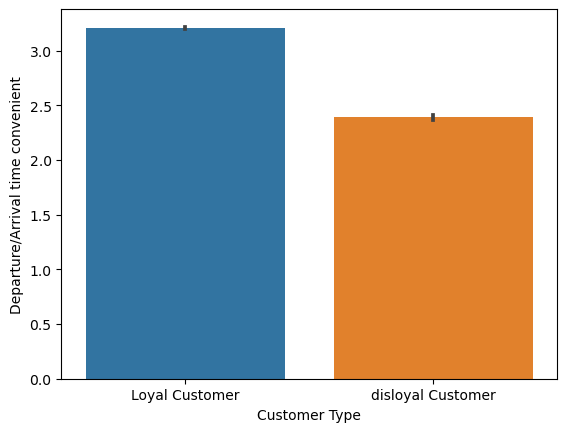

In [71]:
sns.barplot(x='Customer Type', y='Departure/Arrival time convenient', data=df, estimator='mean')

<Axes: xlabel='Customer Type', ylabel='Seat comfort'>

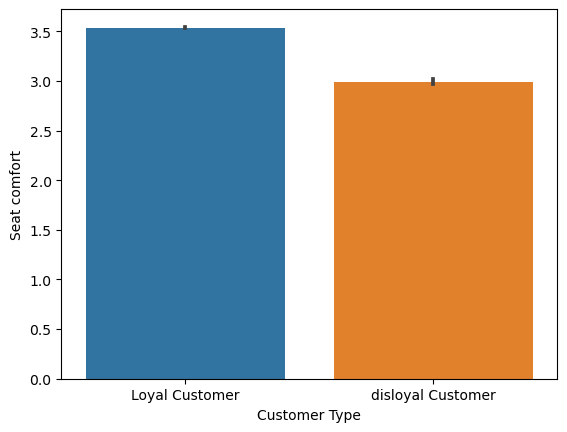

In [72]:

sns.barplot(x='Customer Type', y='Seat comfort', data=df, estimator='mean')

<Axes: xlabel='Customer Type', ylabel='Online boarding'>

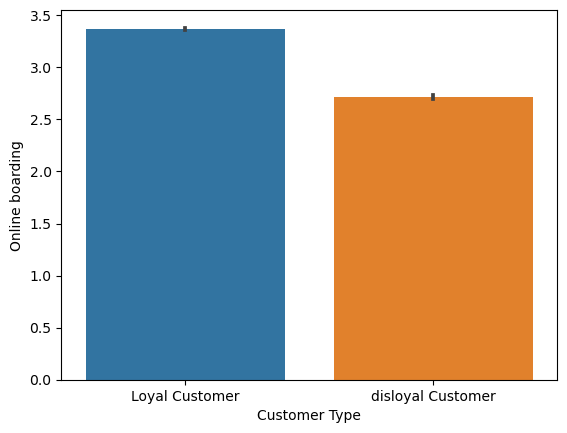

In [73]:

sns.barplot(x='Customer Type', y='Online boarding', data=df, estimator='mean')

### Müşteri Sadakati ile Memnuniyet Arasındaki İlişki

- **Sadakat seviyesi** ile **memnuniyet** arasında güçlü bir ilişki gözlenmektedir.  
  **Sadık müşteriler** arasında memnuniyet oranı oldukça yüksektir ve dağılım dengelidir.  
  Buna karşılık, **sadık olmayan müşteriler** büyük ölçüde memnuniyetsizdir.  
  Bu durum, müşteri sadakatinin memnuniyetle doğrudan ilişkili olduğunu ve müşteri bağlılığının hizmet kalitesi algısını olumlu etkilediğini göstermektedir.

- **Sadık müşteriler**, büyük oranda **Business Class**’ı tercih etmektedir.  
  Bu da onların markaya olan bağlılıklarının, daha yüksek bütçeli ve konfor odaklı tercihlerle örtüştüğünü gösterir.

- **Sadık olmayan müşterilerin** büyük kısmı ise **Economy Class**’ta yer almakta, bu da daha fiyat odaklı, belki de fırsatçı seyahat alışkanlıklarına işaret etmektedir.

- Sadık müşterilerin büyük bölümü **iş seyahati** yapmaktadır.  
  Bu durum, sık uçan ve iş amaçlı seyahat eden yolcuların sadakat programlarına daha çok dahil olduğunu göstermektedir.

- İlginç bir şekilde, **sadık olmayan yolcuların neredeyse tamamı da iş seyahati yapan gruptan oluşmaktadır.**  
  Bu da, seyahat sıklığı yüksek olsa da müşteri memnuniyetinin sağlanamadığı bir kitlenin varlığına işaret eder.

#### Sadakat ve Hizmet Memnuniyeti

- Aşağıdaki hizmetlerde, **sadık müşterilerin ortalama puanları daha yüksektir**:
  - **Seat comfort**
  - **Inflight entertainment**
  - **Cleanliness**
  - **Food and drink**
  - **Online boarding**
  - **Departure/Arrival time convenient**

Bu gözlem, sadakatle birlikte hizmet deneyiminin de pozitif yönde geliştiğini göstermektedir.


### Type of Travel

<Axes: xlabel='Type of Travel', ylabel='count'>

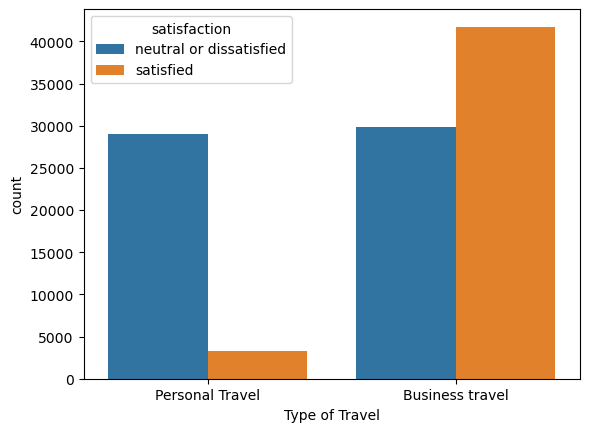

In [74]:
#Seyehat türüne göre memnuniyet
sns.countplot(x="Type of Travel", hue="satisfaction", data=df)


<Axes: xlabel='Type of Travel', ylabel='Flight Distance'>

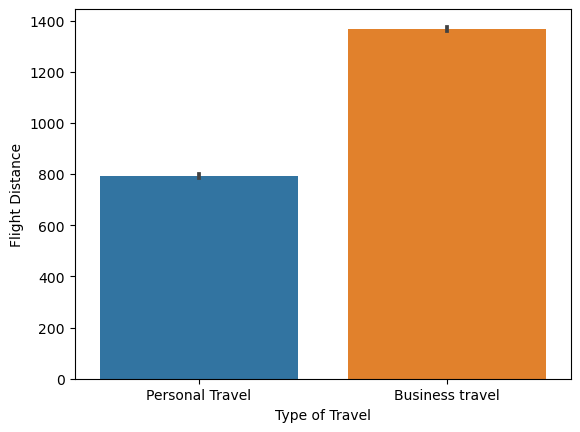

In [75]:
sns.barplot(x='Type of Travel', y='Flight Distance', data=df, estimator='mean')

<Axes: xlabel='Class', ylabel='count'>

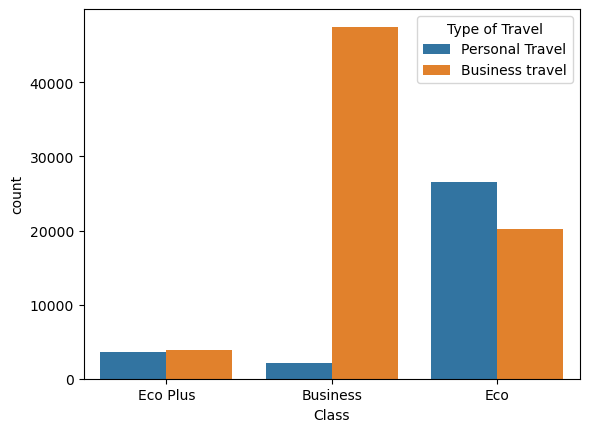

In [76]:
#Seyehat türüne göre uçuş sınıfı dağılımı
sns.countplot(x="Class", hue="Type of Travel", data=df)

In [77]:
#Seyehat türüne göre hizmet skorları
df.groupby("Type of Travel")[service_columns].mean().round(2)


,Inflight wifi service,Checkin service,Seat comfort,Inflight entertainment,Cleanliness,Inflight service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,On-board service,Leg room service,Baggage handling
Type of Travel,,,,,,,,,,,,,,
Business travel,2.82,3.29,3.55,3.49,3.36,3.66,2.79,2.88,3.00,3.26,3.45,3.43,3.47,3.66
Personal Travel,2.52,3.34,3.19,3.06,3.13,3.60,3.65,2.48,2.92,3.08,2.80,3.27,3.08,3.58


### 1. Seyahat Türüne Göre Memnuniyet Dağılımı

- Grafik, seyahat türüne göre yolcu memnuniyetini göstermektedir.
- **Business Travel** yapan yolcuların çoğunluğu memnun görünmektedir; memnun (satisfied) olan yolcu sayısı, memnun olmayanlardan belirgin şekilde fazladır.
- **Personal Travel** yapan yolcuların büyük çoğunluğu ise “neutral or dissatisfied” kategorisindedir.
- Bu sonuç, iş amaçlı seyahat edenlerin genel olarak daha tatmin edici bir deneyim yaşadığını göstermektedir.
### 2. Seyahat Türüne Göre Ortalama Uçuş Mesafesi

- Bar grafiği, seyahat türüne göre ortalama uçuş mesafesini göstermektedir.
- **Business Travel** yolcularının ortalama uçuş mesafesi yaklaşık **1400 km** ile oldukça yüksektir.
- **Personal Travel** yolcularında bu ortalama **800 km** civarındadır.
- Bu fark, iş seyahatlerinin genellikle daha uzak destinasyonlara yapıldığını göstermektedir.

    ### 3. Seyahat Türüne Göre Uçuş Sınıfı Tercihleri

- Grafik, uçuş sınıflarının seyahat türlerine göre dağılımını göstermektedir.
- **Business Class** açık ara farkla Business Travel yolcuları tarafından tercih edilmiştir.
- **Eco Class**, daha çok Personal Travel yolcuları tarafından tercih edilmektedir.
- **Eco Plus** sınıfı, her iki seyahat türü için de en az tercih edilen sınıftır.
- Bu sonuç, konforlu sınıfların iş seyahatiyle, ekonomik sınıfların ise kişisel seyahatle daha çok ilişkilendirildiğini ortaya koymaktadır.



### Class

<Axes: xlabel='Class', ylabel='count'>

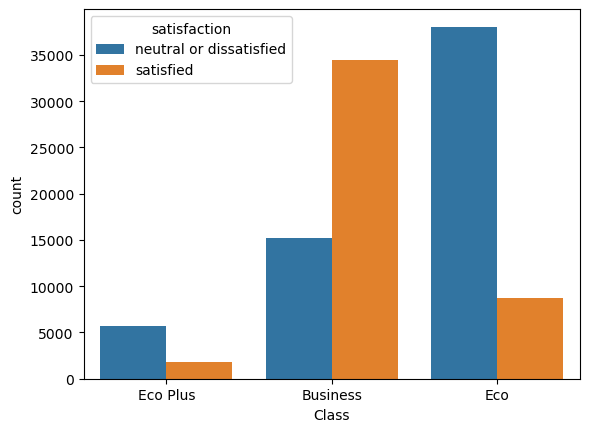

In [78]:
#Sınıfa göre memnuniyet dağılımı
sns.countplot(x="Class", hue="satisfaction", data=df)


<Axes: xlabel='Class', ylabel='Flight Distance'>

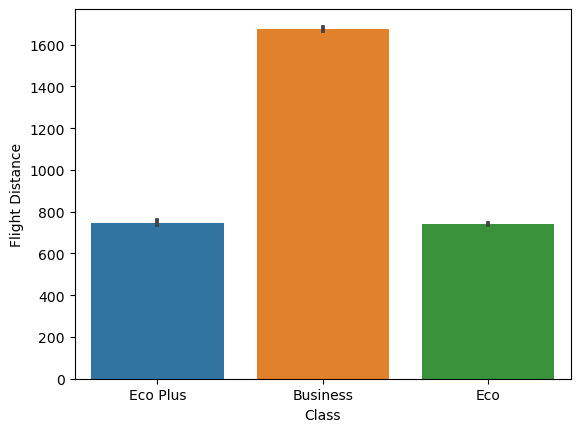

In [79]:
sns.barplot(x='Class', y='Flight Distance', data=df, estimator='mean')

In [80]:
#Class'a göre hzimet puanları

df.groupby("Class")[service_columns].mean().round(2)


,Inflight wifi service,Checkin service,Seat comfort,Inflight entertainment,Cleanliness,Inflight service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,On-board service,Leg room service,Baggage handling
Class,,,,,,,,,,,,,,
Business,2.78,3.52,3.76,3.64,3.48,3.84,2.91,2.91,2.98,3.32,3.72,3.68,3.64,3.84
Eco,2.68,3.12,3.14,3.10,3.11,3.46,3.20,2.61,2.97,3.09,2.81,3.12,3.09,3.45
Eco Plus,2.77,3.02,3.18,3.14,3.13,3.39,3.22,2.66,2.97,3.12,2.89,3.05,3.06,3.36


<Axes: xlabel='Class', ylabel='Online boarding'>

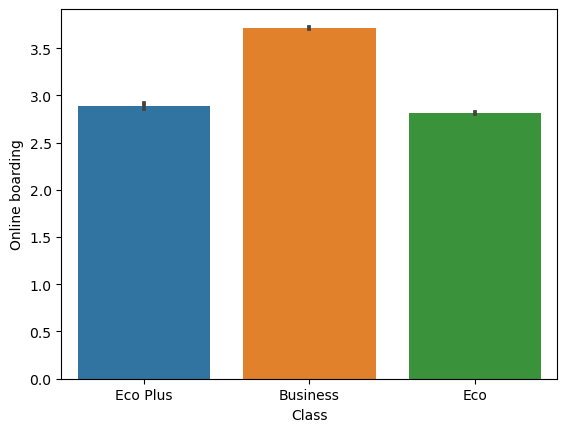

In [81]:

sns.barplot(x='Class', y='Online boarding', data=df, estimator='mean')

### 1. Uçuş Sınıfına Göre Memnuniyet Dağılımı

- Grafik, yolcuların uçuş sınıfı tercihlerine göre memnuniyet düzeylerini göstermektedir.
- **Business Class** yolcularının büyük çoğunluğu memnun (satisfied) görünmektedir. Memnun olmayan yolcu sayısı oldukça düşüktür.
- **Eco Class** yolcularında ise memnuniyetsizlik daha fazladır; memnun olmayan yolcu sayısı, memnun olanlardan çok daha yüksektir.
- **Eco Plus** sınıfında da memnuniyetsizlik öne çıkmaktadır.
- Bu sonuçlar, daha konforlu sınıflarda memnuniyetin arttığını; ekonomik sınıflarda ise memnuniyet düzeyinin düşük kaldığını göstermektedir.
### 2. Uçuş Sınıfına Göre Ortalama Uçuş Mesafesi

- Bu barplot, uçuş sınıfı ile uçulan mesafe arasındaki ilişkiyi ortaya koymaktadır.
- **Business Class** yolcuları ortalama **1700 km** civarında uçuş gerçekleştirmiştir. Bu sınıf en uzun mesafeli seyahatleri temsil etmektedir.
- **Eco** ve **Eco Plus** sınıflarının uçuş mesafeleri ise birbirine yakın olup **yaklaşık 750–800 km** seviyesindedir.
- Bu fark, Business Class’ın daha çok uzun mesafeli – kıtalararası veya iş seyahatlerinde – tercih edildiğini desteklemektedir.
### 3. Uçuş Sınıfına Göre Hizmet Puanları (Ortalama)

- Tablo, uçuş sınıfına göre 14 farklı hizmet için ortalama memnuniyet puanlarını göstermektedir.
- **Business Class**, neredeyse tüm hizmet kalemlerinde en yüksek ortalamalara sahiptir. Özellikle:
  - **Seat comfort (3.76)**,  
  - **Inflight entertainment (3.64)**,  
  - **On-board service (3.68)**,  
  - **Leg room service (3.64)**  
  gibi konfor temelli hizmetlerde ciddi fark yaratmaktadır.
- **Eco** ve **Eco Plus** sınıflarında ise puanlar genel olarak daha düşüktür. Ancak aralarındaki farklar minimaldir.
- **Online booking**, **Gate location**, ve **Food & drink** gibi temel hizmetlerde fark az olsa da, Business Class her zaman öndedir.
- Bu durum, Business Class’ın genel olarak daha yüksek hizmet kalitesi sunduğunu ve müşteri memnuniyetinin daha fazla olduğunu göstermektedir.


### Satisfaction

<Axes: xlabel='satisfaction', ylabel='Departure Delay in Minutes'>

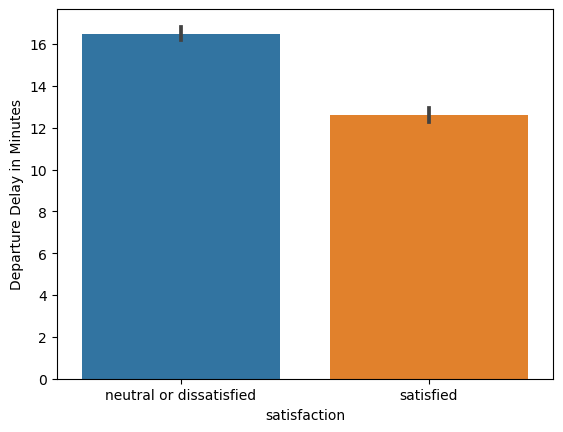

In [82]:
#Gecikmeler
sns.barplot(x='satisfaction', y='Departure Delay in Minutes', data=df, estimator='mean')

<Axes: xlabel='satisfaction', ylabel='Arrival Delay in Minutes'>

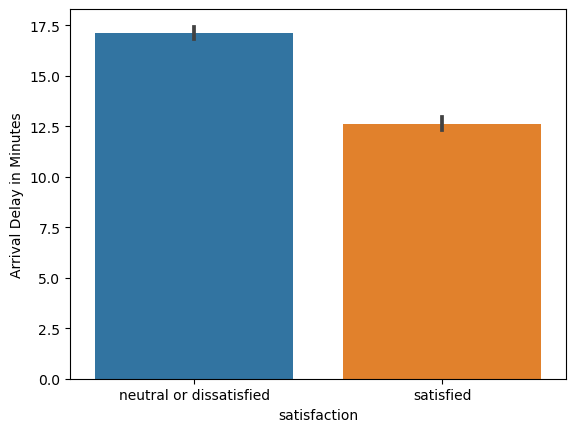

In [83]:
sns.barplot(x='satisfaction', y='Arrival Delay in Minutes', data=df, estimator='mean')

<Axes: xlabel='satisfaction', ylabel='Flight Distance'>

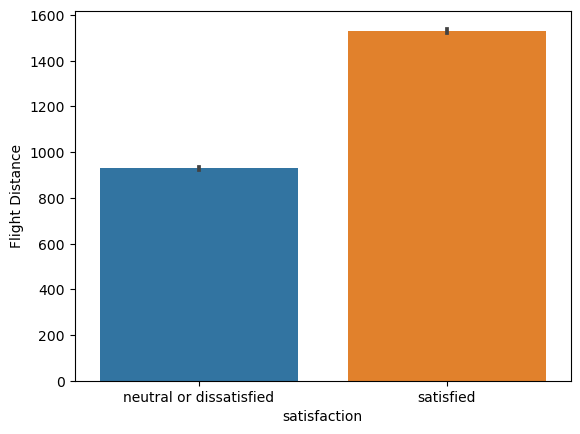

In [84]:
sns.barplot(x='satisfaction', y='Flight Distance', data=df, estimator='mean')

In [85]:

df.groupby("satisfaction")[service_columns].mean().round(2)


,Inflight wifi service,Checkin service,Seat comfort,Inflight entertainment,Cleanliness,Inflight service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,On-board service,Leg room service,Baggage handling
satisfaction,,,,,,,,,,,,,,
neutral or dissatisfied,2.40,3.04,3.04,2.89,2.94,3.39,3.13,2.55,2.98,2.96,2.66,3.02,2.99,3.38
satisfied,3.16,3.65,3.97,3.96,3.74,3.97,2.97,3.03,2.98,3.52,4.03,3.86,3.82,3.97


<Axes: xlabel='satisfaction', ylabel='Inflight wifi service'>

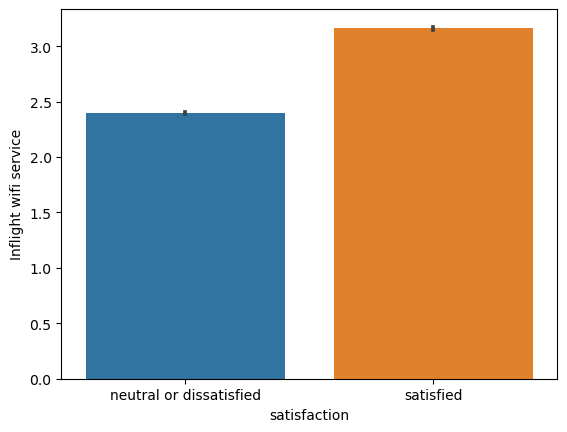

In [86]:
sns.barplot(x="satisfaction", y="Inflight wifi service", data=df)


<Axes: xlabel='satisfaction', ylabel='Checkin service'>

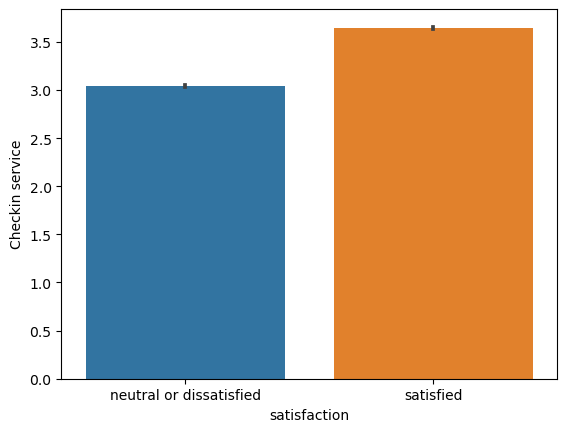

In [87]:
sns.barplot(x="satisfaction", y="Checkin service", data=df)


<Axes: xlabel='satisfaction', ylabel='Seat comfort'>

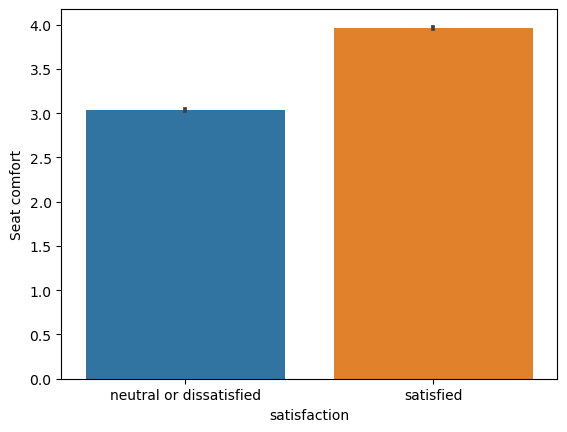

In [88]:
sns.barplot(x="satisfaction", y="Seat comfort", data=df)

<Axes: xlabel='satisfaction', ylabel='Inflight entertainment'>

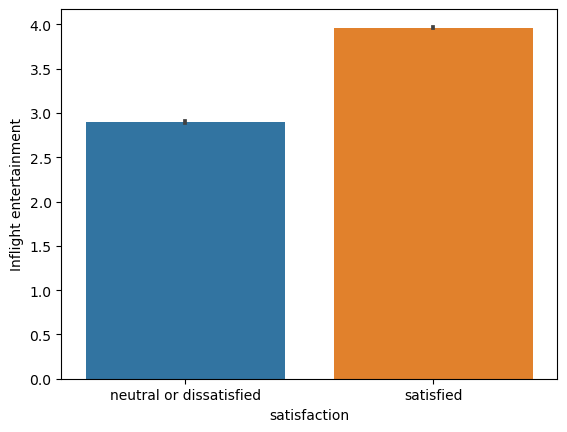

In [89]:
sns.barplot(x="satisfaction", y="Inflight entertainment", data=df)

<Axes: xlabel='satisfaction', ylabel='Cleanliness'>

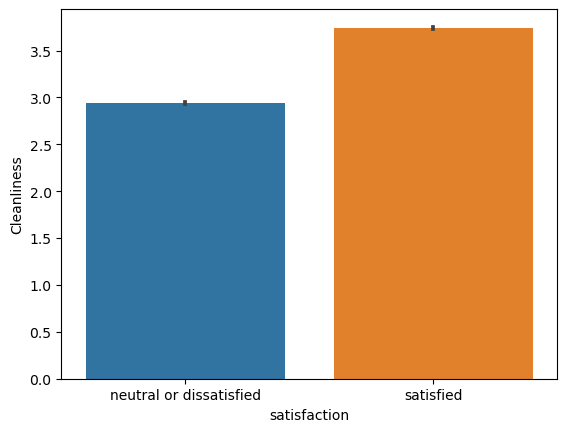

In [90]:
sns.barplot(x="satisfaction", y="Cleanliness", data=df)

<Axes: xlabel='satisfaction', ylabel='Online boarding'>

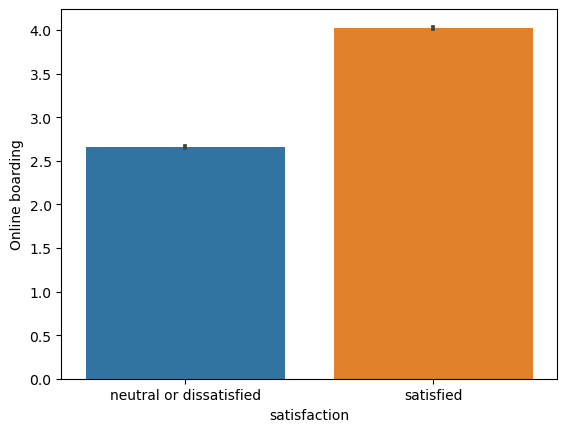

In [91]:
sns.barplot(x="satisfaction", y="Online boarding", data=df)

<Axes: xlabel='satisfaction', ylabel='Departure/Arrival time convenient'>

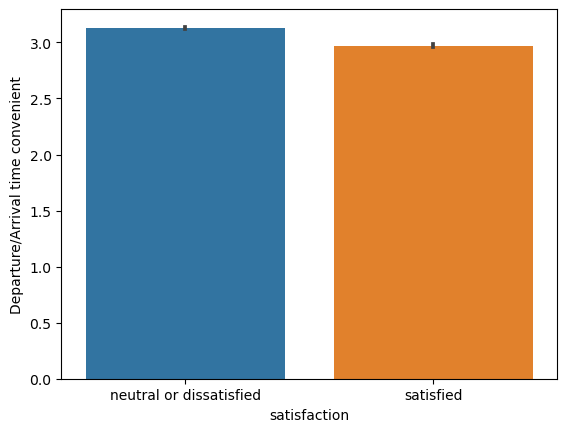

In [92]:
sns.barplot(x="satisfaction", y="Departure/Arrival time convenient", data=df)

<Axes: xlabel='satisfaction', ylabel='On-board service'>

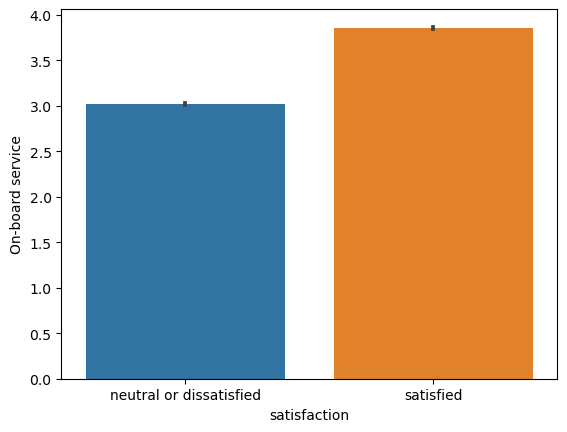

In [93]:
sns.barplot(x="satisfaction", y="On-board service", data=df)

<Axes: xlabel='satisfaction', ylabel='Leg room service'>

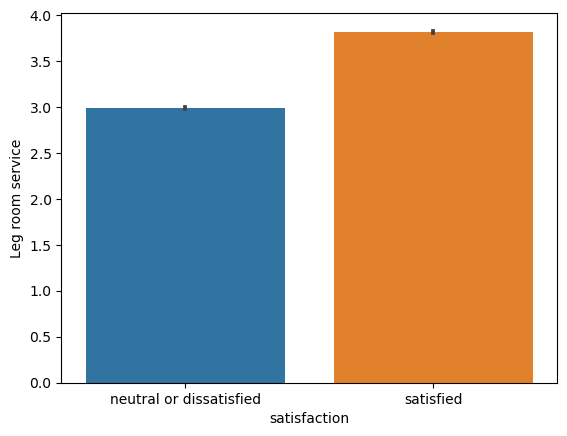

In [94]:
sns.barplot(x="satisfaction", y="Leg room service", data=df)

### 1. Kalkış Gecikmesi ile Memnuniyet İlişkisi

- Grafikte, memnuniyet düzeyine göre ortalama kalkış gecikme süresi gösterilmektedir.
- **Memnun olmayan yolcuların ortalama kalkış gecikmesi yaklaşık 16.5 dakika**,  
  **memnun yolcuların ise 12.5 dakika** civarındadır.
- Bu fark, gecikmelerin müşteri memnuniyetini olumsuz etkilediğini göstermektedir.
- Kalkış dakikliğinin artırılması, genel memnuniyeti yükseltmek için etkili bir adımdır.
### 2. Varış Gecikmesi ile Memnuniyet İlişkisi

- Bu grafik, memnuniyet ile varış gecikmesi arasındaki ilişkiyi ortaya koymaktadır.
- **Memnun olmayan yolcuların varış gecikmesi ortalama 17.5 dakika**,  
  **memnun olanlarda bu süre yaklaşık 13 dakika** civarındadır.
- Varışta yaşanan gecikmelerin de memnuniyet üzerinde ciddi etkisi olduğu görülmektedir.
- Zamanında varış, müşteri algısında önemli bir memnuniyet belirleyicisidir.
### 3. Uçuş Mesafesi ile Memnuniyet İlişkisi

- Grafik, uçuş mesafesinin memnuniyet düzeyiyle ilişkisini göstermektedir.
- **Memnun olan yolcuların ortalama uçuş mesafesi 1500 km**,  
  **memnun olmayan yolcuların ise ortalama 950 km** civarındadır.
- Bu durum, uzun mesafeli uçuşların daha fazla konfor ve hizmet sunma potansiyeli nedeniyle daha yüksek memnuniyetle sonuçlandığını düşündürmektedir.
### 4. Memnuniyet Düzeyine Göre Hizmet Skorları

- Tabloda, memnun ve memnun olmayan yolcuların verdiği ortalama hizmet puanları karşılaştırılmıştır.
- **Memnun yolcular**, tüm hizmet alanlarında daha yüksek puan vermiştir.
  - En yüksek farklar:  
    - **Seat comfort**: 3.97 vs. 3.04  
    - **Inflight entertainment**: 3.96 vs. 2.89  
    - **Online boarding**: 4.03 vs. 2.66  
    - **On-board service**: 3.86 vs. 3.02
- En düşük memnuniyet farkı **Gate location**’da gözlenmiştir (her iki grup da 2.98 puan vermiştir).
- Bu tablo, memnuniyetin yalnızca zamanlama değil, aynı zamanda konfor ve hizmet kalitesine de sıkı şekilde bağlı olduğunu net biçimde ortaya koymaktadır.


### Arrival Delay in Minutes 

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='arrival_delay_group', ylabel='Departure/Arrival time convenient'>

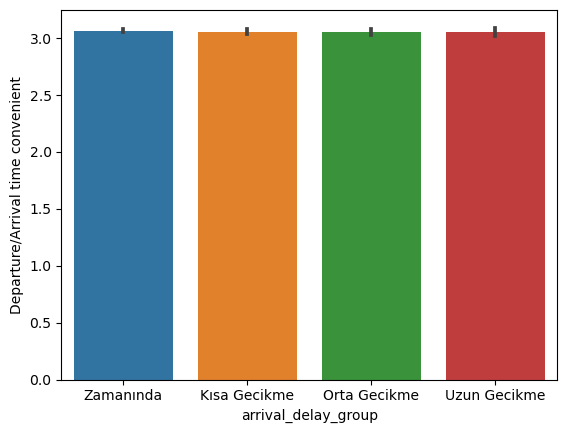

In [95]:
df['arrival_delay_group'] = pd.cut(df['Arrival Delay in Minutes'],
                                   bins=[-1, 0, 15, 60, 9999],
                                   labels=['Zamanında', 'Kısa Gecikme', 'Orta Gecikme', 'Uzun Gecikme'])
sns.barplot(x='arrival_delay_group', y='Departure/Arrival time convenient', data=df, estimator='mean')


### Departure Delay in Minutes

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='departure_delay_group', ylabel='Departure/Arrival time convenient'>

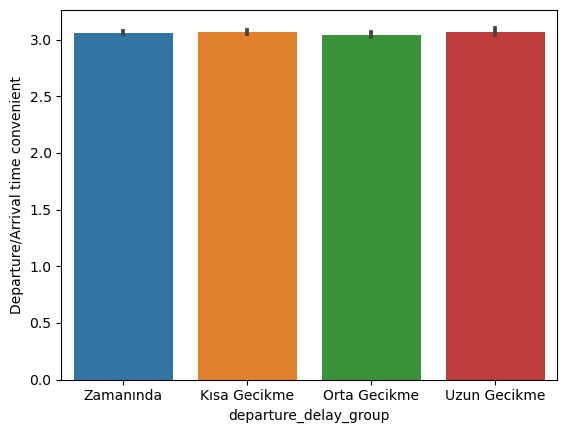

In [96]:
df['departure_delay_group'] = pd.cut(df['Departure Delay in Minutes'],
                                     bins=[-1, 0, 15, 60, 9999],
                                     labels=['Zamanında', 'Kısa Gecikme', 'Orta Gecikme', 'Uzun Gecikme'])


sns.barplot(x='departure_delay_group', y='Departure/Arrival time convenient', data=df, estimator='mean')


### 1. Kalkış Gecikmesi Gruplarına Göre Zaman Uygunluğu (Departure Delay)

- Grafik, uçuşların kalkış gecikmesi süresine göre yolcuların "zaman uygunluğu" değerlendirmelerini göstermektedir.
- Gecikme grupları:  
  - **Zamanında**,  
  - **Kısa Gecikme (0–15 dk)**,  
  - **Orta Gecikme (15–60 dk)**,  
  - **Uzun Gecikme (60+ dk)**  
- Tüm gruplarda zaman uygunluğu ortalaması yaklaşık **3.05 civarındadır**.
- **Gecikme süresi uzadıkça zaman uygunluğu puanı hafifçe düşmektedir**, ancak fark oldukça küçük.
- Bu da yolcuların zaman uygunluğu puanlarını, sadece gecikme süresine göre değil; uçuş planlamasının genel uygunluğuna göre verdiğini göstermektedir.


### Korelasyon 

In [97]:
# Sayısal sütunlar 
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Unnamed: 0', 'id'])

# Korelasyon matrisi
corr_matrix = numerical_df.corr()


In [98]:

numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Unnamed: 0', 'id'])
corr_matrix = numerical_df.corr()

corr_matrix.style \
    .background_gradient(cmap='coolwarm') \
    .format("{:.2f}")


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.00,0.10,0.02,0.04,0.02,-0.00,0.02,0.21,0.16,0.08,0.06,0.04,-0.05,0.04,-0.05,0.05,-0.01,-0.01
Flight Distance,0.10,1.00,0.01,-0.02,0.07,0.00,0.06,0.21,0.16,0.13,0.11,0.13,0.06,0.07,0.06,0.09,0.00,-0.00
Inflight wifi service,0.02,0.01,1.00,0.34,0.72,0.34,0.13,0.46,0.12,0.21,0.12,0.16,0.12,0.04,0.11,0.13,-0.02,-0.02
Departure/Arrival time convenient,0.04,-0.02,0.34,1.00,0.44,0.44,0.00,0.07,0.01,-0.00,0.07,0.01,0.07,0.09,0.07,0.01,0.00,-0.00
Ease of Online booking,0.02,0.07,0.72,0.44,1.00,0.46,0.03,0.40,0.03,0.05,0.04,0.11,0.04,0.01,0.04,0.02,-0.01,-0.01
Gate location,-0.00,0.00,0.34,0.44,0.46,1.00,-0.00,0.00,0.00,0.00,-0.03,-0.01,0.00,-0.04,0.00,-0.00,0.01,0.01
Food and drink,0.02,0.06,0.13,0.00,0.03,-0.00,1.00,0.23,0.57,0.62,0.06,0.03,0.03,0.09,0.03,0.66,-0.03,-0.03
Online boarding,0.21,0.21,0.46,0.07,0.40,0.00,0.23,1.00,0.42,0.29,0.16,0.12,0.08,0.20,0.07,0.33,-0.02,-0.02
Seat comfort,0.16,0.16,0.12,0.01,0.03,0.00,0.57,0.42,1.00,0.61,0.13,0.11,0.07,0.19,0.07,0.68,-0.03,-0.03
Inflight entertainment,0.08,0.13,0.21,-0.00,0.05,0.00,0.62,0.29,0.61,1.00,0.42,0.30,0.38,0.12,0.40,0.69,-0.03,-0.03


### Korelasyon Matrisi Yorumları

- Korelasyon matrisine baktığımızda özellikle bazı hizmetler arasında güçlü ilişkiler olduğunu görüyoruz.
- Örneğin, **Seat comfort**, **Leg room service** ve **Inflight entertainment** arasında yüksek korelasyon bulunmaktadır.  
  Bu da yolcuların uçak içi konforu ayrı ayrı değil, **bütüncül bir deneyim** olarak değerlendirdiğini gösteriyor.
  
- Benzer şekilde, **Inflight wifi service** ile **Ease of online booking** arasında da anlamlı bir ilişki vardır.  
  Bu durum, dijital hizmetlerin yolcu memnuniyetinde **birbirini destekleyen alanlar** olarak çalıştığını göstermektedir.

- Diğer yandan, **yaş (Age)** gibi bazı demografik değişkenler ile hizmet değerlendirmeleri arasında neredeyse **hiçbir anlamlı korelasyon bulunmamaktadır**.

- Bu analiz bize şunu söylüyor:  
  > "Bir hizmet alanında yapılacak iyileştirme, doğrudan ilişkili diğer hizmet alanlarında da memnuniyeti artırabilir."


## Sonuç ve Öneriler

### Genel Gözlemlerim

- Memnuniyet düzeyini en çok etkileyen faktörler uçuşun zamanında olması, uçak içi konfor ve genel hizmet kalitesi.
- Özellikle sadık müşteriler ve Business Class yolcuları daha yüksek memnuniyet bildirmiş.
- Wi-Fi, online boarding ve rezervasyon gibi dijital hizmetler memnuniyet üzerinde önemli, ancak bu alanlarda kullanıcı deneyimi yeterince iyi değil.
- Bazı hizmetler (örneğin koltuk rahatlığı, diz mesafesi, eğlence) birbiriyle güçlü şekilde ilişkili. Yani yolcular bu hizmetleri tek tek değil, bütünsel olarak değerlendiriyor.

---

### Önerilerim

- **Online boarding ve rezervasyon sistemleri** daha kullanıcı dostu hale getirilmeli, mobil uygulama deneyimi geliştirilebilir.
- **Uçak içi konfor** (koltuk, bacak mesafesi) daha standart ve tatmin edici seviyeye getirilmeli.
- **Wi-Fi kalitesi ve eğlence içerikleri** iyileştirilmeli, özellikle genç yolcuların beklentileri daha yüksek.
- **Gecikmelerin nedenleri detaylı incelenmeli**, operasyonel iyileştirmeler yapılmalı.
- **Kabin içi ve yer personeli** için hizmet kalitesini artıracak eğitimler verilmeli.

---

